### 0. Paths & libraries

In [1]:
import os
import sys

# Paths
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
utils_path = os.path.join(project_root, 'utils')
models_path = os.path.join(project_root, 'models')
data_path = os.path.join(project_root, 'data_sample')

# Add utils path to sys.path
sys.path.append(utils_path)

In [27]:
import time
import math
import random
from tqdm.notebook import tqdm  # Notebook-friendly version
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import numpy as np
import rasterio as rio
import numpy as np
import pandas as pd
import data_preprocessing as dP

# Statistics
from scipy.stats import randint, uniform
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

# from osgeo import gdal
# from scipy import ndimage, datasets
from scipy.ndimage import binary_dilation,binary_opening
# from PIL import Image, ImageFilter

# Plotting
# import richdem as rd
# from glob import glob
# from rasterio.plot import show
import matplotlib.pyplot as plt
import seaborn as sns
import viz as vz
import plotly.express as px
import plotly.express as px
# from IPython.display import display, HTML

# Preprocessing & pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model selection and optimization
from sklearn.model_selection import cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

# Deep Learning
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, cohen_kappa_score, classification_report

### 1. Save & Load data

In [27]:
# Images and labels directories
image_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/images'
label_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/labels' 

# Select the number of images to be processed
M = float(input("Indicar porcentaje de imágenes a procesar (valor entre 0 y 1): "))

# Load data using user function. The images are selected randomly among the total number of avilable images (1631)
X, y = dP.process_images(M,image_dir,label_dir)

Image processing:   0%|          | 0/163 [00:00<?, ?it/s]

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
[Image 1068.tif] Total: 0.15s | Load: 0.09s | SAR: 0.00s | Slope & Aspect: 0.03sLabel: 0.01s | Flatten & Satack: 0.01s
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (To

#### 1.1 Save data

In [ ]:
X_path = os.path.join(data_path, 'X.pkl')
y_path = os.path.join(data_path, 'y.pkl')

X.to_pickle(X_path)
y.to_pickle(y_path)

#### 1.2 Load data

In [3]:
# Load X,y dataframes (10% of the total images)
X_path = os.path.join(data_path, 'X.pkl') 
y_path = os.path.join(data_path, 'y.pkl')
X= pd.read_pickle(X_path)
y = pd.read_pickle(y_path)

### 2. Data visualisation & cleaning

#### 2.1 Viz

In [4]:
X.head(20)

VV      VH     VH_VV     VV_VH      NORM  DEM_mer  DEM_cop   SLOPE  \
0    729.0   693.0  0.950617  1.051948 -0.025316     43.0     59.0     0.0   
1   1092.0   794.0  0.727106  1.375315 -0.158006     43.0     58.0     0.0   
2   3234.0   685.0  0.211812  4.721168 -0.650421     45.0     57.0   500.0   
3   2036.0   729.0  0.358055  2.792867 -0.472694     46.0     56.0  1000.0   
4    693.0   575.0  0.829726  1.205217 -0.093060     49.0     55.0     0.0   
5    766.0   353.0  0.460836  2.169972 -0.369080     50.0     55.0  1000.0   
6    766.0   353.0  0.460836  2.169972 -0.369080     52.0     54.0   500.0   
7   1313.0   425.0  0.323686  3.089412 -0.510932     53.0     53.0     0.0   
8   2635.0   340.0  0.129032  7.750000 -0.771429     53.0     53.0     0.0   
9   1961.0   259.0  0.132075  7.571429 -0.766667     53.0     52.0     0.0   
10   861.0   346.0  0.401858  2.488439 -0.426678     51.0     51.0     0.0   
11  1313.0   418.0  0.318355  3.141148 -0.517042     50.0     50.0     0.0   
12   575.0  1059.0  1.841739  0.542965  0.296206     49.0     50.0     0.0   
13   775.0   667.0  0.860645  1.161919 -0.074896     48.0     49.0     0.0   
14   901.0   322.0  0.357381  2.798137 -0.473426     47.0     49.0     0.0   
15   398.0   259.0  0.650754  1.536680 -0.211568     46.0     49.0     0.0   
16   891.0   559.0  0.627385  1.593918 -0.228966     46.0     49.0     0.0   
17  1991.0   641.0  0.321949  3.106084 -0.512918     46.0     50.0     0.0   
18  3330.0   446.0  0.133934  7.466368 -0.763771     46.0     50.0     0.0   
19  3447.0   591.0  0.171453  5.832487 -0.707281     46.0     49.0     0.0   

    ASPECT   WCM  WOP  
0    270.0  10.0  0.0  
1    270.0  10.0  0.0  
2    270.0  10.0  0.0  
3    180.0  30.0  0.0  
4    270.0  10.0  0.0  
5    180.0  30.0  0.0  
6     90.0  10.0  0.0  
7    270.0  10.0  0.0  
8    270.0  10.0  0.0  
9    270.0  10.0  0.0  
10   270.0  10.0  0.0  
11   270.0  10.0  0.0  
12   270.0  10.0  0.0  
13   270.0  10.0  0.0  
14   270.0  10.0  0.0  
15   270.0  10.0  0.0  
16   270.0  10.0  0.0  
17   270.0  10.0  0.0  
18   270.0  10.0  0.0  
19   270.0  10.0  0.0

In [5]:
# Nº of instances and features
n_inst, dim = X.shape[0], X.shape[1]
print(f"Nº of instances (pixels): {n_inst}, nº de features (bands): {dim}")

Nº of instances (pixels): 42729472, nº de features (bands): 11


Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


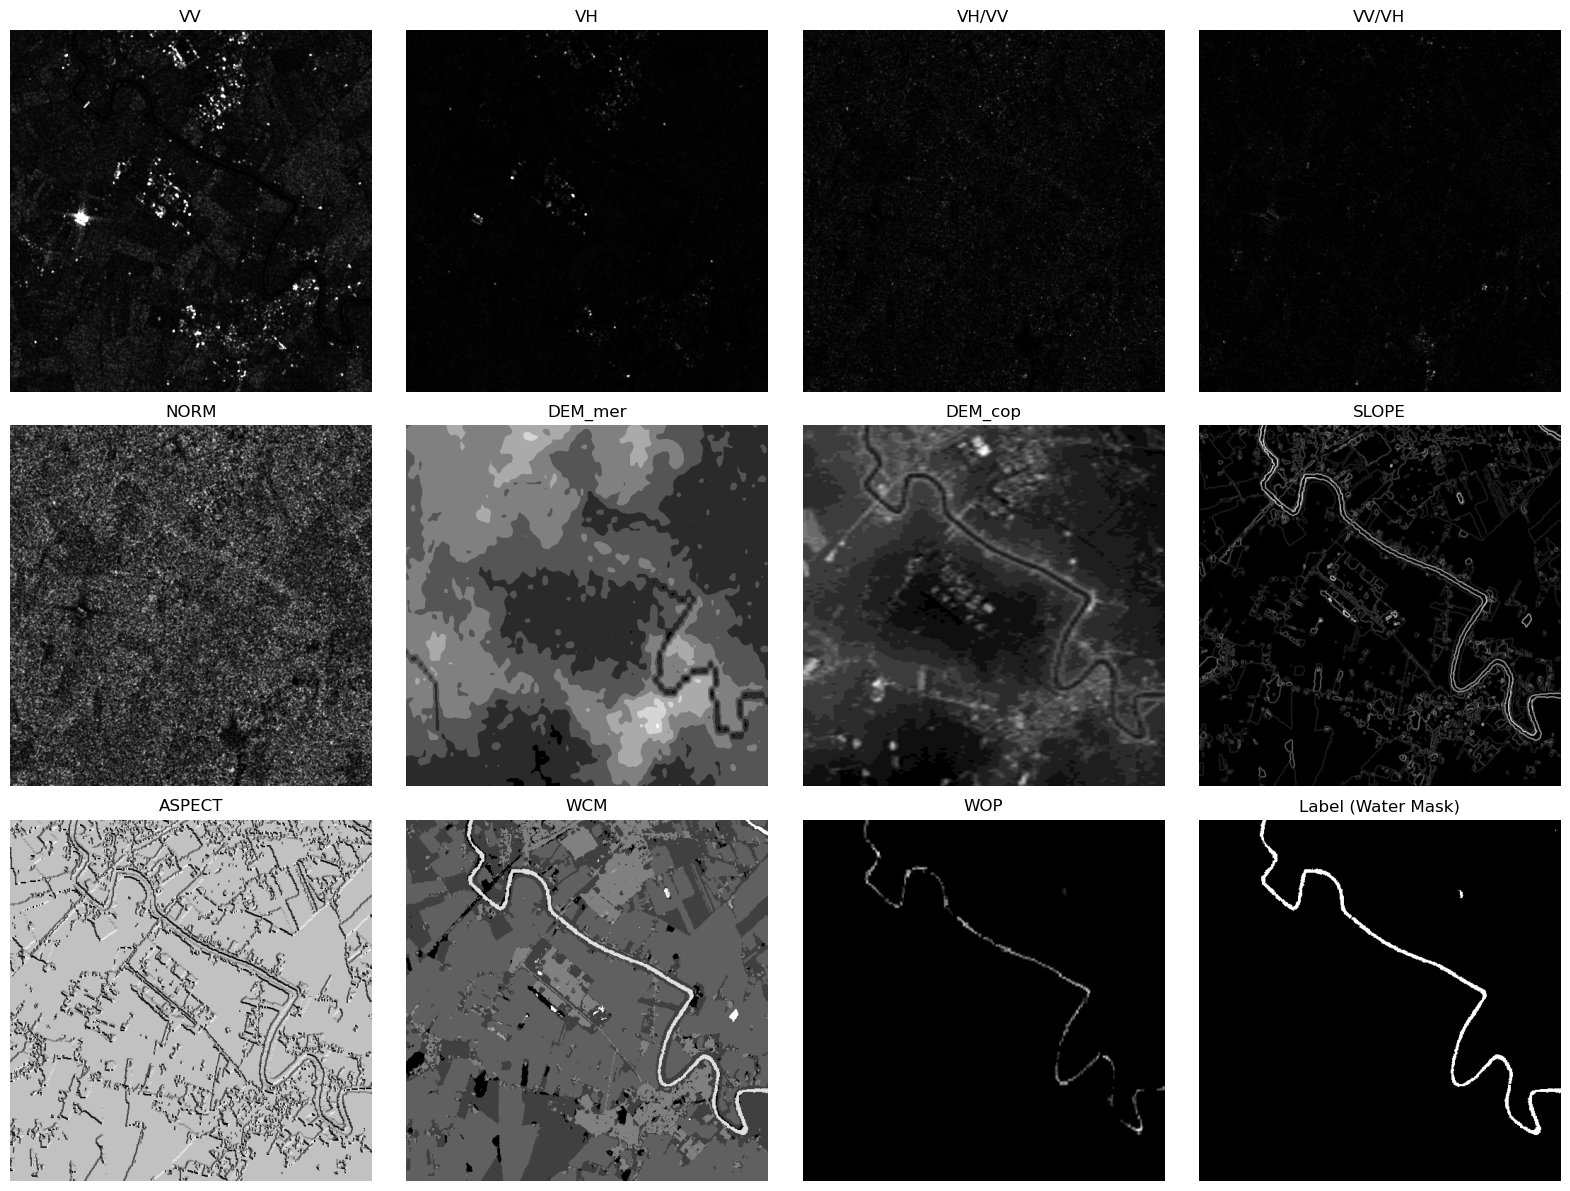

In [6]:
# Features visualization
image_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/images'
label_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/labels' 

# Select the number of images to be processed
n = int(input("Select image number (value between 0 y 1630): "))

vz.visualize_features(n, image_dir,label_dir)

In [7]:
X.describe().T

count         mean          std     min         25%  \
VV       42729472.0  1704.468018  2562.775391     0.0  669.000000   
VH       42729472.0   377.341156   698.837891     0.0  157.000000   
VH_VV    42728074.0          inf          NaN     0.0    0.137107   
VV_VH    42728074.0          inf          NaN     0.0    2.500888   
NORM     42728074.0    -0.569935     0.295390    -1.0   -0.758849   
DEM_mer  42729472.0  -124.271004  1601.768799 -9999.0   24.000000   
DEM_cop  42729472.0   130.470963   262.312988    -4.0   24.000000   
SLOPE    42729472.0   218.437744   438.445557     0.0    0.000000   
ASPECT   42729472.0   245.103699    67.569313     0.0  270.000000   
WCM      42729472.0    31.681793    17.076439     0.0   10.000000   
WOP      42729472.0     4.825125    20.171801     0.0    0.000000   

                 50%          75%           max  
VV       1147.000000  1888.000000  3.276500e+04  
VH        272.000000   441.000000  3.276500e+04  
VH_VV       0.237258     0.399858           inf  
VV_VH       4.214815     7.293556           inf  
NORM       -0.616477    -0.428716  1.000000e+00  
DEM_mer    60.000000   121.000000  2.501000e+03  
DEM_cop    61.000000   122.000000  2.487000e+03  
SLOPE       0.000000   176.776703  5.031153e+03  
ASPECT    270.000000   270.000000  3.581524e+02  
WCM        30.000000    40.000000  1.000000e+02  
WOP         0.000000     0.000000  2.550000e+02

In [8]:
# Percentage of NaN values per feature
nan_percent = (X.isna().sum() / len(X)) * 100
nan_percent = nan_percent.sort_values(ascending=False)  

nan_percent

VH_VV      0.003272
VV_VH      0.003272
NORM       0.003272
VV         0.000000
VH         0.000000
DEM_mer    0.000000
DEM_cop    0.000000
SLOPE      0.000000
ASPECT     0.000000
WCM        0.000000
WOP        0.000000
dtype: float64

Primeras conclusiones:
- El DEM de Meris presenta valores -9999 que se corresponden con valores No data

- El DEM de Copernicus presenta valores negativos, que no tienen sentido físico, hay que eliminarlos o substituirlos (imputación con nuevos valores)

- Variable WCM tiene valores 0.0 que se corresponden con valores No Data conforme información del dataset

- Variable WOP tiene valores >100 que se corresponden con valores No Data conforme información del dataset

#### 2.2 Data cleaning

##### 2.2.1 Remove inf and Na values

In [4]:
# Remove NaN and infinite values
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna().reset_index(drop=True)
y_clean = y.loc[X_clean.index].reset_index(drop=True)

In [5]:
X_clean.describe().T

count         mean          std          min         25%  \
VV       42577931.0  1709.858887  2566.413086     1.000000  674.000000   
VH       42577931.0   378.680389   699.968018     1.000000  158.000000   
VH_VV    42577931.0     0.321469     0.337382     0.000061    0.138024   
VV_VH    42577931.0     6.557336    13.419886     0.006803    2.497521   
NORM     42577931.0    -0.568673     0.293084    -0.999878   -0.757432   
DEM_mer  42577931.0  -124.962204  1604.407593 -9999.000000   25.000000   
DEM_cop  42577931.0   130.682297   262.735229    -4.000000   24.000000   
SLOPE    42577931.0   218.955933   438.751251     0.000000    0.000000   
ASPECT   42577931.0   245.035767    67.653511     0.000000  270.000000   
WCM      42577931.0    31.556120    16.919479     0.000000   10.000000   
WOP      42577931.0     4.647737    19.936184     0.000000    0.000000   

                 50%          75%           max  
VV       1152.000000  1891.000000  32765.000000  
VH        273.000000   442.000000  32765.000000  
VH_VV       0.238036     0.400397    147.000000  
VV_VH       4.201047     7.245098  16382.500000  
NORM       -0.615462    -0.428166      0.986486  
DEM_mer    60.000000   121.000000   2501.000000  
DEM_cop    61.000000   122.000000   2487.000000  
SLOPE       0.000000   176.776703   5031.152832  
ASPECT    270.000000   270.000000    358.152405  
WCM        30.000000    40.000000    100.000000  
WOP         0.000000     0.000000    255.000000

In [6]:
print(X_clean.shape)
print(y_clean.shape)

(42577931, 11)
(42577931, 1)


##### 2.2.2 Remove No Data values (WCM & WOP)

In [7]:
# Drop rows with No Data Values for WCM and WOP columns
X_clean, y_clean = dP.drop_NoData_rows(X_clean, y_clean)

In [8]:
print(X_clean.shape)
print(y_clean.shape)

(42309821, 11)
(42309821, 1)


In [9]:
X_clean.describe().T

count         mean          std          min         25%  \
VV       42309821.0  1716.817383  2572.816406     1.000000  679.000000   
VH       42309821.0   379.908417   701.937988     1.000000  159.000000   
VH_VV    42309821.0     0.321059     0.337545     0.000061    0.137741   
VV_VH    42309821.0     6.572161    13.457809     0.006803    2.500000   
NORM     42309821.0    -0.569140     0.292001    -0.999878   -0.757869   
DEM_mer  42309821.0  -126.304848  1609.243164 -9999.000000   24.000000   
DEM_cop  42309821.0   130.873245   263.383057    -4.000000   24.000000   
SLOPE    42309821.0   220.321548   439.586578     0.000000    0.000000   
ASPECT   42309821.0   244.877274    69.977242     0.000000  270.000000   
WCM      42309821.0    31.745090    16.757149    10.000000   10.000000   
WOP      42309821.0     4.662310    19.964731     0.000000    0.000000   

                 50%          75%           max  
VV       1157.000000  1898.000000  32765.000000  
VH        274.000000   443.000000  32765.000000  
VH_VV       0.237611     0.400000    147.000000  
VV_VH       4.208556     7.260000  16382.500000  
NORM       -0.616016    -0.428571      0.986486  
DEM_mer    59.000000   121.000000   2501.000000  
DEM_cop    61.000000   122.000000   2487.000000  
SLOPE       0.000000   176.776703   5031.152832  
ASPECT    270.000000   270.000000    358.152405  
WCM        30.000000    40.000000    100.000000  
WOP         0.000000     0.000000    100.000000

### 3. Train-test split

In [10]:
#Seleccionamos train y test
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state= 43) 

print(X_train.shape)
print(y_train.shape)

(33847856, 11)
(33847856, 1)


### 4. Variable target

In [9]:
y_train.value_counts(normalize=True)*100

Labels
0.0       91.606112
1.0        8.393888
Name: proportion, dtype: float64

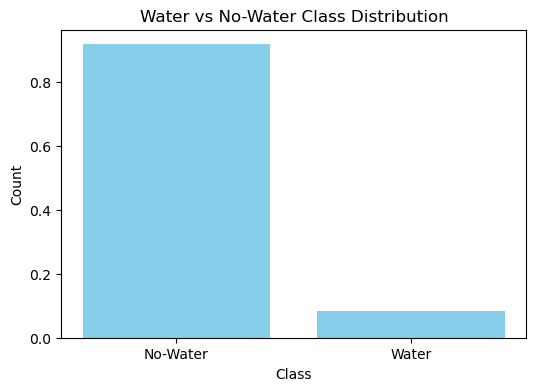

In [11]:
# Calculate frequency of each class
label_freq = y_train['Labels'].value_counts(normalize=True).sort_index()

# Create mapping
label_names = {0.0: 'No-Water', 1.0: 'Water'}
label_names_list = [label_names[val] for val in label_freq.index]

# Plot
plt.figure(figsize=(6,4))
plt.bar(label_names_list, label_freq.values, color='skyblue')
plt.title('Water vs No-Water Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

Las clases están muy desbalanceadas, siendo la clase target o positiva (water) la de menor proporción

### 5. Features

#### 5.1 Univariate analysis

In [22]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 34062344 entries, 36109201 to 24393540
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   VV       float32
 1   VH       float32
 2   VH_VV    float32
 3   VV_VH    float32
 4   NORM     float32
 5   DEM_mer  float32
 6   DEM_cop  float32
 7   SLOPE    float32
 8   ASPECT   float32
 9   WCM      float32
 10  WOP      float32
dtypes: float32(11)
memory usage: 1.6 GB


In [17]:
X_train.describe().T

count         mean          std     min    25%     50%  \
VV       34183577.0  1704.335571  2556.093994     0.0  669.0  1147.0   
VH       34183577.0   377.245148   698.790649     0.0  157.0   272.0   
DEM_mer  34183577.0  -124.344040  1594.781616 -9999.0   24.0    60.0   
DEM_cop  34183577.0   130.485687   262.264160    -4.0   24.0    61.0   
SLOPE    34183577.0   218.445328   439.617706     0.0    0.0     0.0   
ASPECT   34183577.0   245.102890    65.263268     0.0  270.0   270.0   
WCM      34183577.0    31.681047    17.006695     0.0   10.0    30.0   
WOP      34183577.0     4.827497    20.140676     0.0    0.0     0.0   

                 75%           max  
VV       1888.000000  32765.000000  
VH        441.000000  32765.000000  
DEM_mer   121.000000   2501.000000  
DEM_cop   122.000000   2487.000000  
SLOPE     176.776703   5031.152832  
ASPECT    270.000000    358.152405  
WCM        40.000000    100.000000  
WOP         0.000000    255.000000

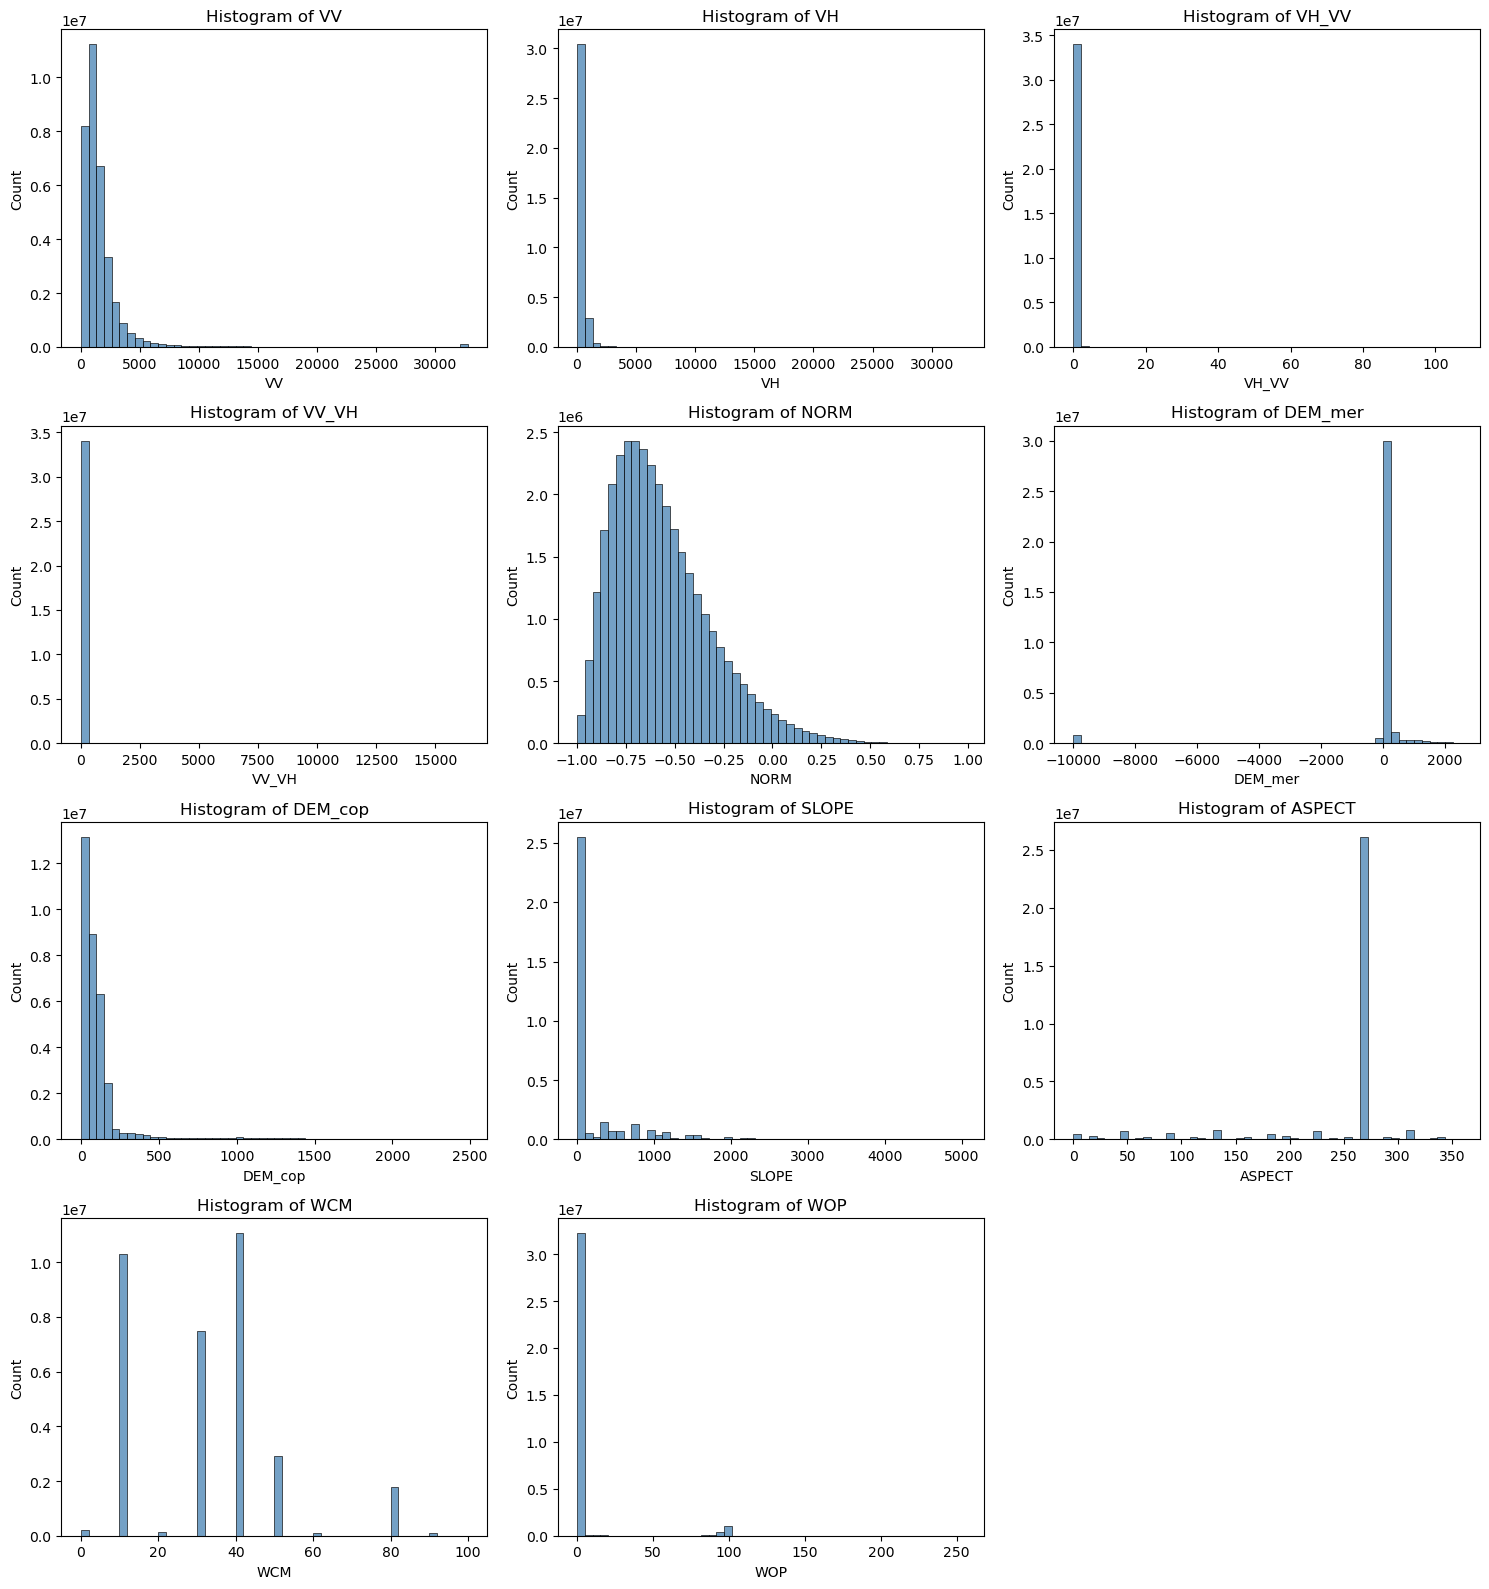

In [23]:
# Feature histograms
vz.plot_feature_histograms(X_train)


##### Conclusiones & Próximos pasos

1. Seleccionar un DEM y eliminar los valores negativos

2. La feature WCM es categórica, con la siguiente correspondencia de clases. El valor 0 no es un valor válido: missing data, pixels masked due to cloud, shadows or quality issues


| Class Code | Class Name                          | Description                                |
|------------|--------------------------------------|--------------------------------------------|
| 10         | Tree cover                          | Natural & planted forest and tree crops    |
| 20         | Shrubland                           | Woody vegetation < 5m                      |
| 30         | Grassland                           | Natural grasslands and managed pastures    |
| 40         | Cropland                            | Cultivated areas, incl. rice & mosaics     |
| 50         | Built-up                            | Urban areas, buildings, roads              |
| 60         | Bare / sparse vegetation            | Desert, rock, salt flats, very sparse veg  |
| 70         | Snow and ice                        | Permanent snow, glaciers                   |
| 80         | Permanent water bodies              | Lakes, rivers, reservoirs, etc.            |
| 90         | Herbaceous wetland                  | Swamps, marshes with herbaceous plants     |
| 95         | Mangroves                           | Coastal, saline-tolerant forest/shrubs     |
| 100        | Moss and lichen                     | Tundra, high-latitude moss/lichen areas    |


3. El valor predominante en WOP es 0, que significa 0% de probabilidad de ocurrencia de agua. Distribución similar a la de la variable target

4. Predominan superficies de baja cota (valores DEM próximos a 0) y sin pendiente (valores de pendiente próximos a 0)

5. Los valores de pendientes elevados, corresponden con acantilados o edificios (ej: un valor de 5000 equivale a unos 88º, lo que se corresponde con una pared vertical)

6. La variable aspect indica la orientación de la pendiente. Se va a binnear y tratar como una categórica. El valor 270 de aspecto se corresponde con un valor dummy asignado por richdem a las superficies planas (librería con la que se ha calculado pendiente y orientación/aspect)

| Class        | Angle Range (°)         | Label |
|--------------|--------------------------|-------|
| Flat         | = 270                    | Flat  |
| North        | 337.5 – 360 and 0 – 22.5 | N     |
| North-East   | 22.5 – 67.5              | NE    |
| East         | 67.5 – 112.5             | E     |
| South-East   | 112.5 – 157.5            | SE    |
| South        | 157.5 – 202.5            | S     |
| South-West   | 202.5 – 247.5            | SW    |
| West         | 247.5 – 269.9 and 270.1 – 292.5 | W     |
| North-West   | 292.5 – 337.5            | NW    |


#### 5.2 Features categóricas: tratamiento y análisis bivariante con el target

##### 5.2.1 Feature engineering: categorical derived features

In [9]:
# Feature aspect binning transformation
X_train = dP.bin_aspect_to_direction(X_train)

In [10]:
X_train.ORIENT.value_counts()

ORIENT
Flat    26085854
E        1143132
NW       1109922
SE       1103004
N        1059396
S        1030556
NE        985222
SW        976007
W         569251
Name: count, dtype: int64

In [ ]:
# Feature WMC
X_train = dP.map_wcm_classes_no_drop(X_train)

X_train.WCM_LABEL.value_counts(normalize=True)*100

WCM_LABEL
Cropland                    32.478164
Tree cover                  30.194270
Grassland                   21.964854
Built-up                     8.583297
Permanent water bodies       5.199613
No Data                      0.615404
Shrubland                    0.401631
Bare / sparse vegetation     0.285159
Herbaceous wetland           0.272342
Moss and lichen              0.005044
Snow and ice                 0.000223
Name: proportion, dtype: float64

In [12]:
# Drop 'No Data' from X_train and reset index
mask_train = X_train['WCM_LABEL'] != 'No Data'
X_train = X_train[mask_train].reset_index(drop=True)
y_train = y_train[mask_train].reset_index(drop=True)

In [ ]:
# Create a df for plotting and statistical analysis
y_labeled = y_train.copy()
y_labeled['Label'] = y_labeled[y_train.columns[0]].map({0: 'No-Water', 1: 'Water'})
y_labeled['Label_num'] = y_labeled[y_train.columns[0]]
df = pd.concat([X_train, y_labeled[['Label','Label_num']]], axis=1)

##### 5.2.2 Viz

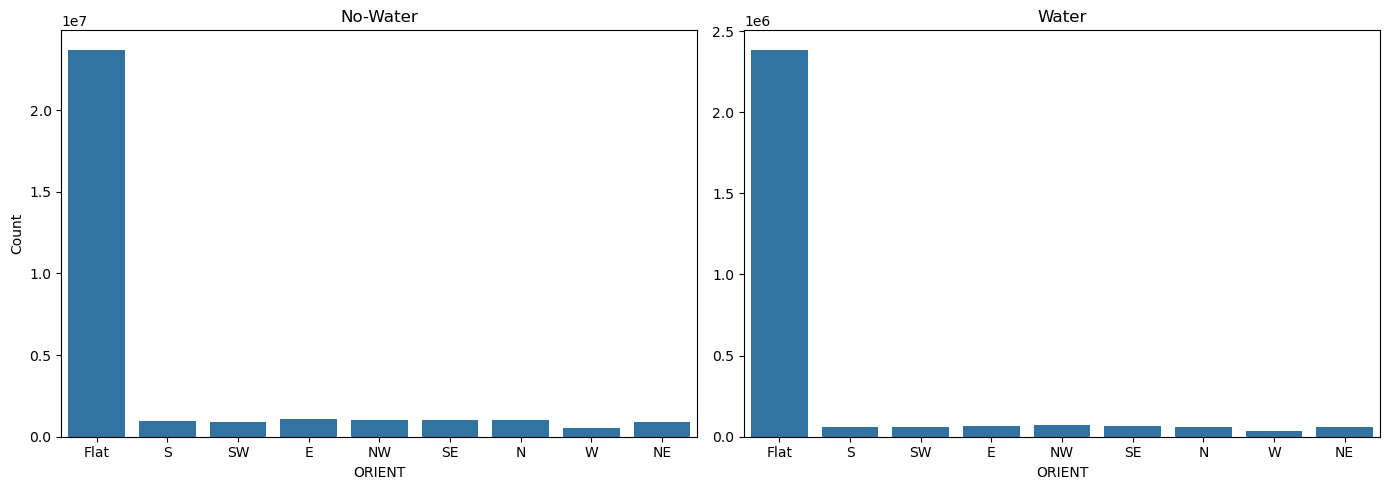

In [ ]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
orient_order = df['ORIENT'].unique().tolist()  # or sort manually if preferred

# Plot No-Water
sns.countplot(x='ORIENT', data=df[df['Label'] == 'No-Water'], ax=axes[0], order=orient_order)
axes[0].set_title('No-Water')
axes[0].set_xlabel('ORIENT')
axes[0].set_ylabel('Count')

# Plot Water
sns.countplot(x='ORIENT', data=df[df['Label'] == 'Water'], ax=axes[1], order=orient_order)
axes[1].set_title('Water')
axes[1].set_xlabel('ORIENT')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Las distribuciones de ORIENT son similares tanto en zonas inundadas como no inundadas por lo que no parece una feature muy informativa

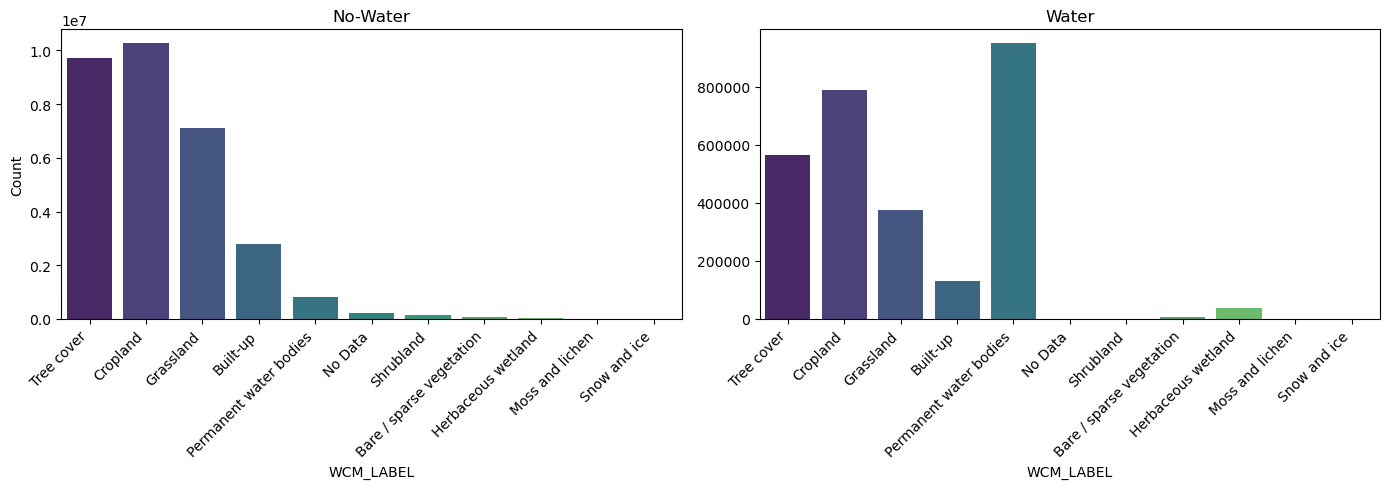

In [ ]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
wcm_order = df['WCM_LABEL'].dropna().unique().tolist()  # or sort manually if preferred

# Plot No-Water
sns.countplot(x='WCM_LABEL', data=df[df['Label'] == 'No-Water'], ax=axes[0], order=wcm_order,palette='viridis')
axes[0].set_title('No-Water')
axes[0].set_xlabel('WCM_LABEL')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
# axes[0].tick_params(axis='x', rotation=45)

# Plot Water
sns.countplot(x='WCM_LABEL', data=df[df['Label'] == 'Water'], ax=axes[1], order=wcm_order, palette='viridis')
axes[1].set_title('Water')
axes[1].set_xlabel('WCM_LABEL')
axes[1].set_ylabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
# axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### 5.2.3 Statistical test

In [ ]:
# Chi-squared test for ORIENT
contingency_orient = pd.crosstab(df['ORIENT'], df['Label_num'])
chi2_orient, p_orient, _, _ = chi2_contingency(contingency_orient)

# Chi-squared test for WCM_LABEL
contingency_wcm = pd.crosstab(df['WCM_LABEL'], df['Label_num'])
chi2_wcm, p_wcm, _, _ = chi2_contingency(contingency_wcm)

# Results
print(f"Chi-squared test for ORIENT vs Target:")
print(f"  Chi2 = {chi2_orient:.2f}, p-value = {p_orient:.4f}")

print(f"\nChi-squared test for WCM_LABEL vs Target:")
print(f"  Chi2 = {chi2_wcm:.2f}, p-value = {p_wcm:.4f}")

Chi-squared test for ORIENT vs Target:
  Chi2 = 84755.05, p-value = 0.0000

Chi-squared test for WCM_LABEL vs Target:
  Chi2 = 5118084.65, p-value = 0.0000


In [16]:
contingency_orient

Label_num       0.0      1.0
ORIENT                      
E           1077592    65540
Flat       23491748  2384494
N            997738    61658
NE           926844    58374
NW          1040127    69794
S            970280    60272
SE          1035075    67929
SW           918560    57447
W            536179    33072

#### 5.3 Features numéricas: tratamiento y análisis bivariante con el target

##### 5.3.1 DEM negative values treatment

In [17]:
# Analysis of the negative values in the DEMs
DEM_meris_percent_negative = (X_train['DEM_mer'] < 0).mean() * 100
print(f"Percentage of negative DEM_meris values: {DEM_meris_percent_negative:.2f}%")

DEM_cop_percent_negative = (X_train['DEM_cop'] < 0).mean() * 100
print(f"Percentage of negative DEM_cop values: {DEM_cop_percent_negative:.2f}%")

Percentage of negative DEM_meris values: 2.55%
Percentage of negative DEM_cop values: 0.66%


In [18]:
# Replace negative values in DEM_cop with values from DEM_mer
X_train['DEM_cop_filled'] = X_train['DEM_cop'].where(X_train['DEM_cop'] >= 0, X_train['DEM_mer'])
X_train['DEM_cop_filled'] = X_train['DEM_cop_filled'].apply(lambda x: x if x >= 0 else 0)


In [19]:
DEM_cop_percent_negative = (X_train['DEM_cop_filled'] < 0).mean() * 100
print(f"Percentage of negative DEM_cop_filled values: {DEM_cop_percent_negative:.2f}%")

Percentage of negative DEM_cop_filled values: 0.00%


In [20]:
# sns.boxplot(x=X_train['DEM_cop_filled'], color='steelblue',whis=3)

##### 5.3.2 WOP values

In [33]:
# Values > 100 mean No Data
X_train[X_train['WOP']>100].value_counts().sum()

4740

In [34]:
# Delete rows with WOP > 100
mask = X_train['WOP'] <= 100
X_train = X_train[mask].reset_index(drop=True)
y_train = y_train[mask].reset_index(drop=True)

In [35]:
num_features = ['VV','VH','VH_VV','VV_VH','NORM','DEM_cop_filled','SLOPE','WOP']

In [36]:
# Create a df for plotting and statistical analysis
y_labeled = y_train.copy()
y_labeled['Label'] = y_labeled[y_train.columns[0]].map({0: 'No-Water', 1: 'Water'})
y_labeled['Label_num'] = y_labeled[y_train.columns[0]]
df = pd.concat([X_train, y_labeled[['Label','Label_num']]], axis=1)

##### 5.3.3 Visual analysis

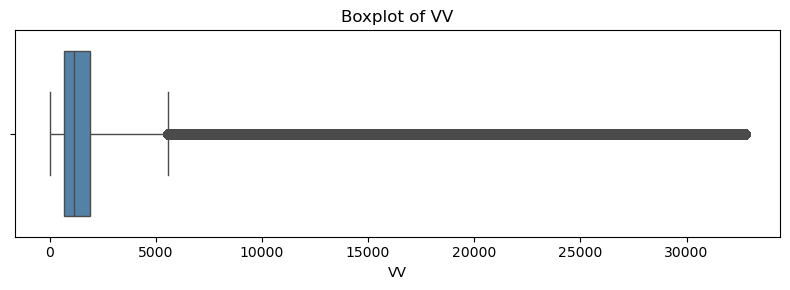

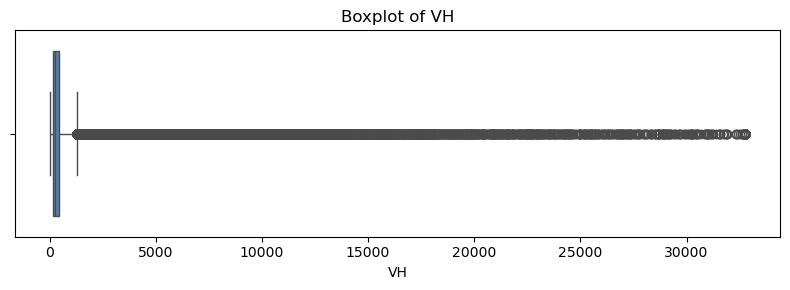

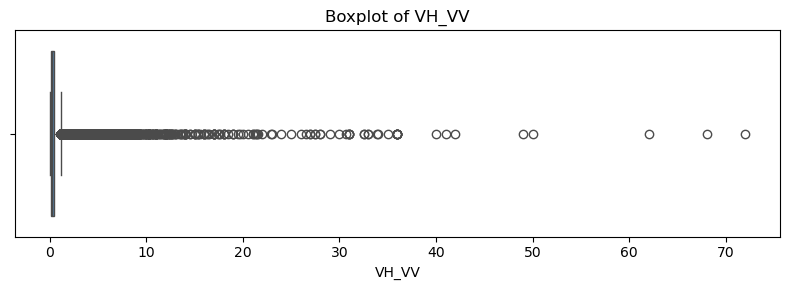

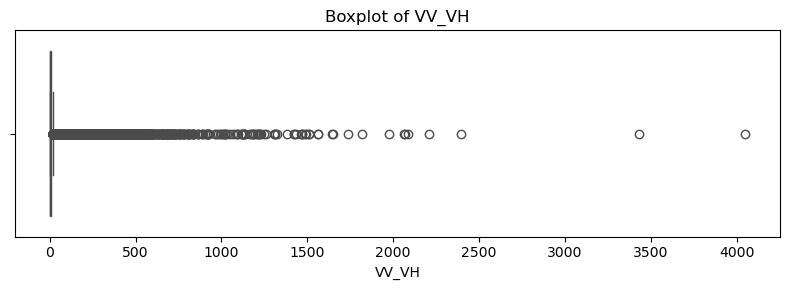

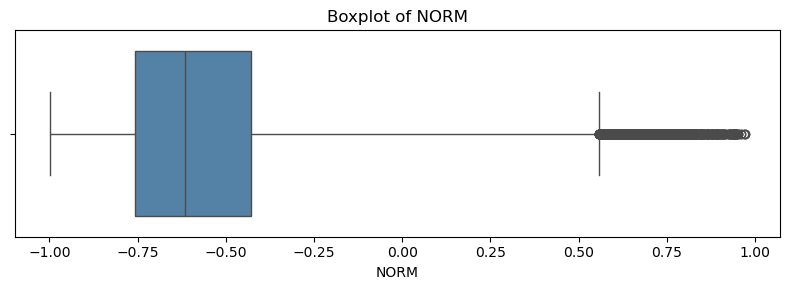

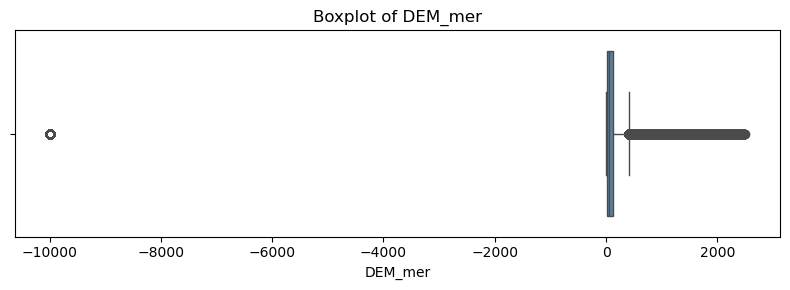

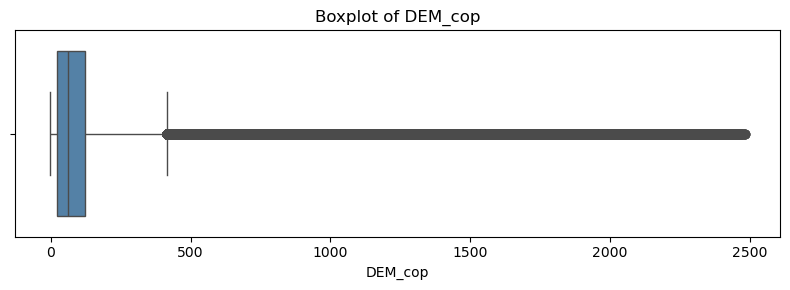

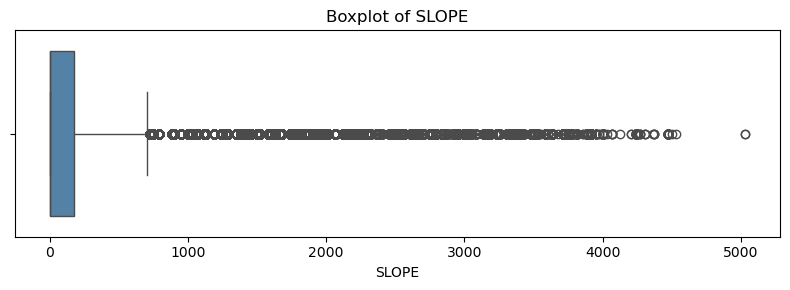

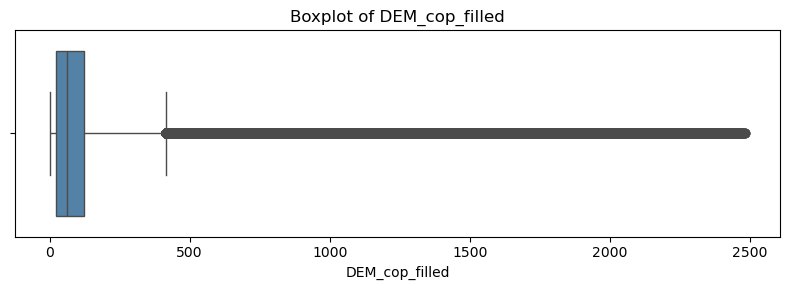

In [43]:
# Boxplot of the numerical features
X_sample = X_train.sample(n=3000000, random_state=42) #10% of the data

# Plot one boxplot per feature
for col in num_features:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=X_sample[col], color='steelblue',whis=3)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


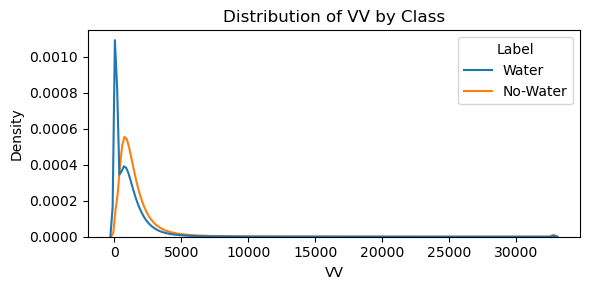

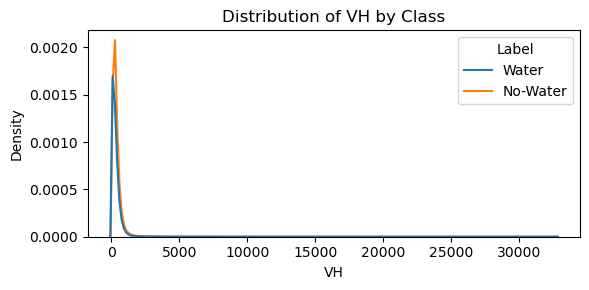

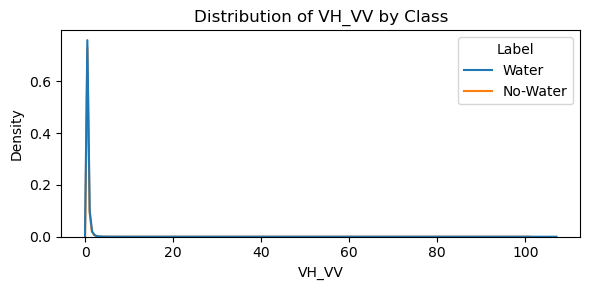

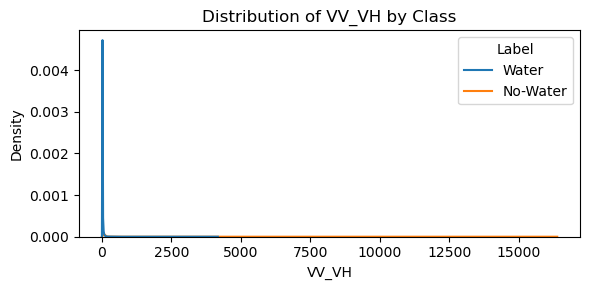

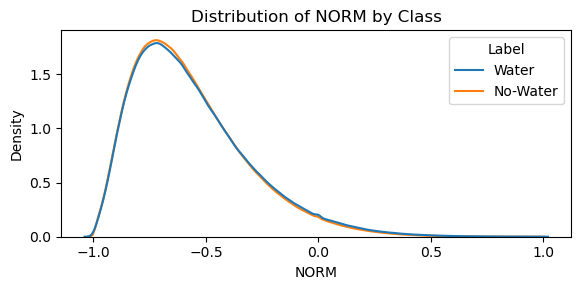

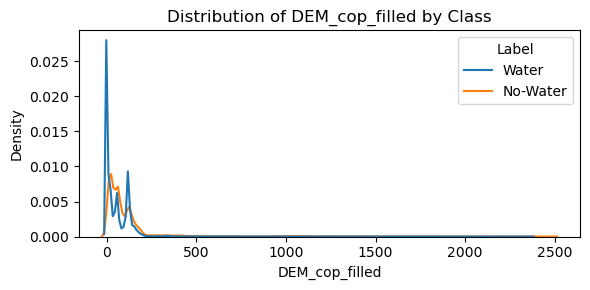

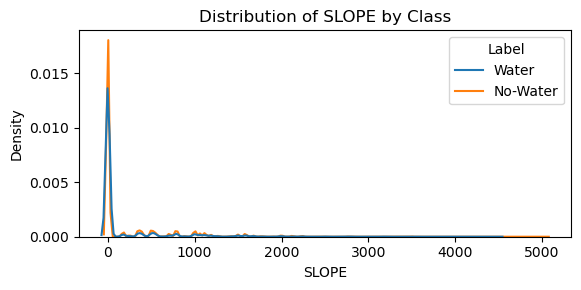

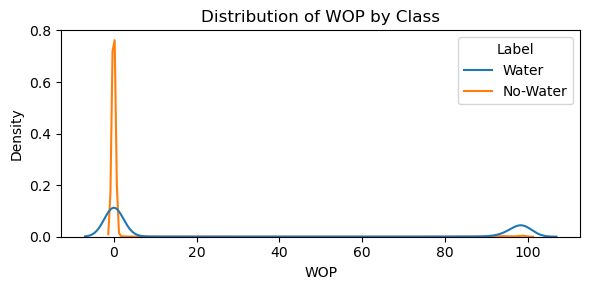

In [38]:
X_sample = df.sample(n=50000, random_state=42) #10% of the data
# KDE plot of the numerical features
for col in num_features:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(data=df, x=col, hue='Label', common_norm=False)
    plt.title(f'Distribution of {col} by Class')
    plt.tight_layout()
    plt.show()


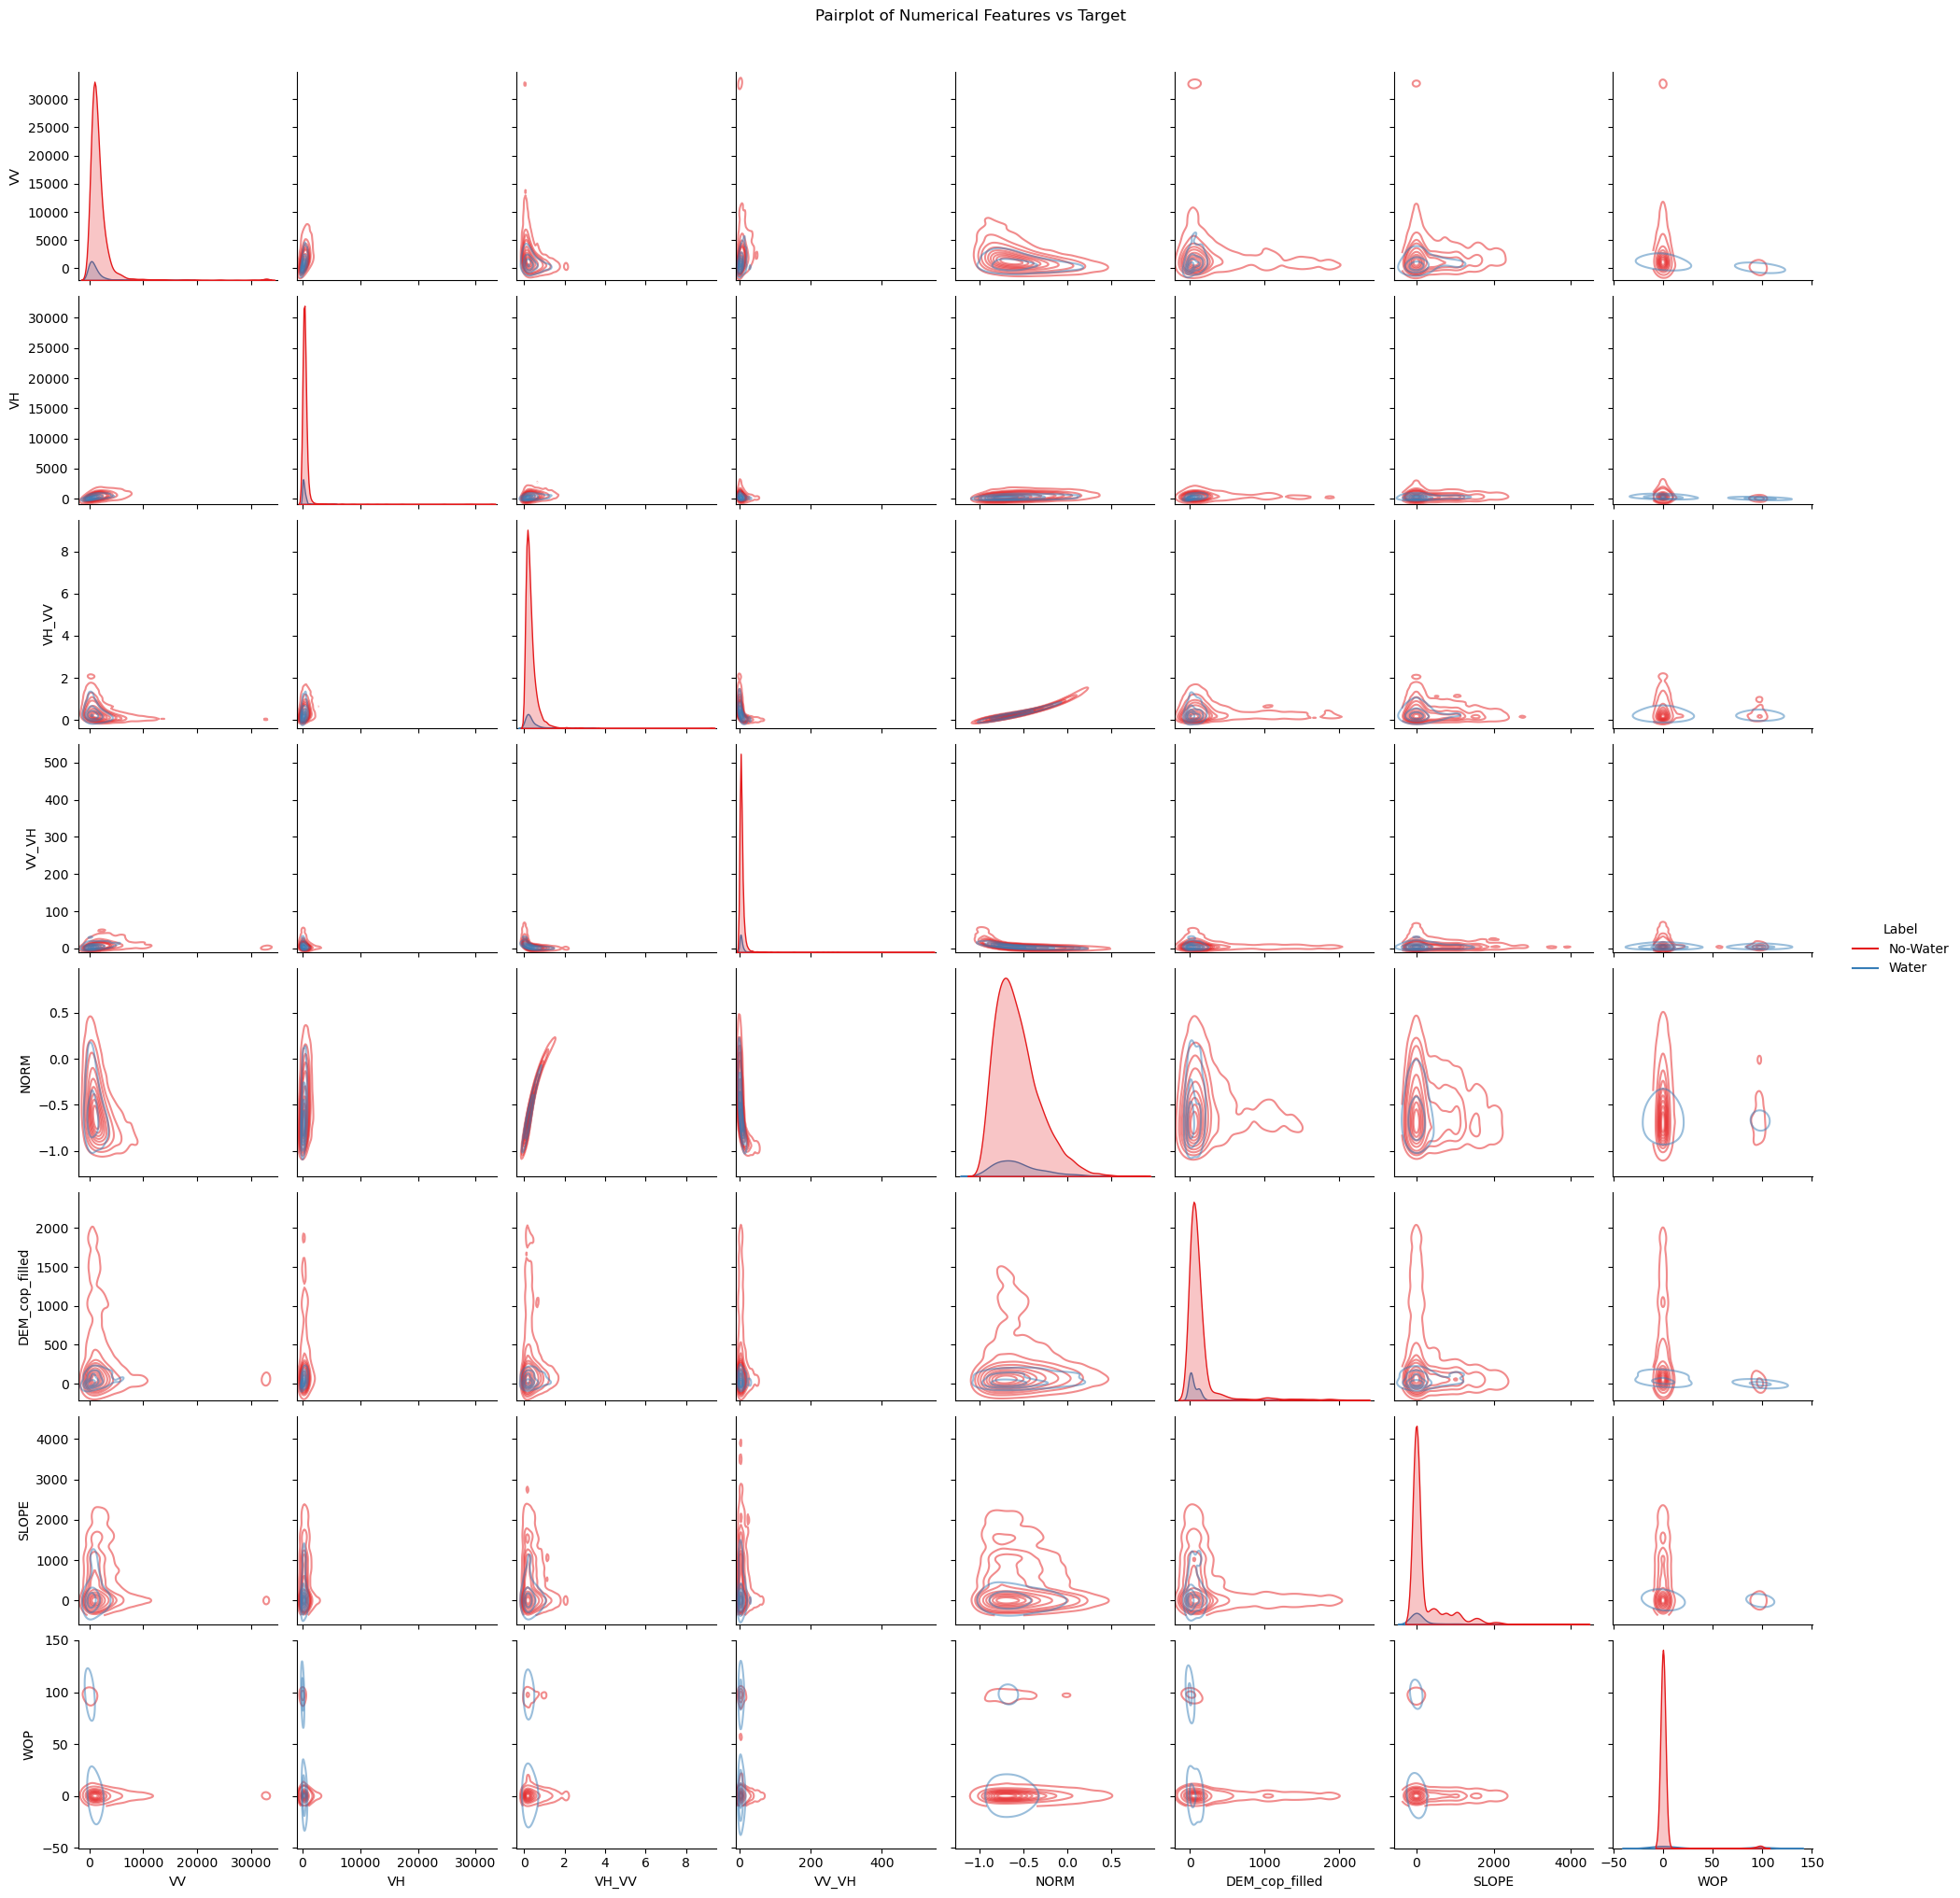

In [37]:
# Create a df for plotting
X_sample = df.sample(n=5000, random_state=42)

# Plot
sns.pairplot(data=X_sample[num_features + ['Label']],
             hue='Label',
             palette='Set1',
             plot_kws={'alpha': 0.5, 's': 20},  # s = marker size
             kind='kde') 

plt.suptitle("Pairplot of Numerical Features vs Target", y=1.02)
plt.show()

##### 5.3.4. Statistical test

In [39]:
# Mann-Whitney U test for numerical features to test for significant differences between classes
results = [] #  DataFrame to store results

for col in num_features:
    group_0 = df[df['Label'] == 'No-Water'][col]
    group_1 = df[df['Label'] == 'Water'][col]
    
    stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
    results.append({'Feature': col, 'U_statistic': stat, 'p_value': p})


u_test_results = pd.DataFrame(results).sort_values(by='p_value') # Results to DataFrame

print(u_test_results) # Show results

          Feature   U_statistic  p_value
0              VV  5.947295e+13      0.0
1              VH  5.921278e+13      0.0
2           VH_VV  4.366875e+13      0.0
3           VV_VH  4.489649e+13      0.0
4            NORM  4.366875e+13      0.0
5  DEM_cop_filled  5.975574e+13      0.0
6           SLOPE  4.783732e+13      0.0
7             WOP  2.949873e+13      0.0


##### 5.3.5 Transformations

In [ ]:
# Log transformation of numerical features
X_train_log = X_train.copy()
X_train_log[num_features]=X_train_log[num_features].apply(lambda x: np.log1p(x))

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = X_train_log.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train_log[num_features])

In [ ]:
X_train_scaled.describe().T

count          mean          std          min  \
VV              34062344.0  1.463354e-16     1.000000    -6.270064   
VH              34062344.0  2.775736e-17     1.000000    -4.999024   
VH_VV           34062344.0  1.755844e-15     1.000000    -1.384918   
VV_VH           34062344.0  3.253199e-15     1.000000    -2.553863   
NORM            34062344.0  3.550445e-15     1.000000   -11.867659   
DEM_mer         34062344.0 -1.248043e+02  1596.967651 -9999.000000   
DEM_cop         34062344.0  1.307178e+02   262.671143    -4.000000   
SLOPE           34062344.0  4.072797e-18     1.000000    -0.575455   
ASPECT          34062344.0  2.450340e+02    65.790146     0.000000   
WCM             34062344.0  3.155326e+01    16.943253     0.000000   
WOP             34062344.0  4.646528e+00    19.878271     0.000000   
DEM_cop_filled  34062344.0 -3.828389e-15     1.000000    -2.742917   

                       25%         50%         75%          max  
VV               -0.455024    0.079785    0.575025     3.423057  
VH               -0.456725    0.108212    0.606939     5.074309  
VH_VV            -0.692383   -0.240946    0.419522    23.706634  
VV_VH            -0.705244   -0.114921    0.570546    11.867615  
NORM             -0.570546    0.114921    0.705244     2.553863  
DEM_mer          25.000000   60.000000  121.000000  2501.000000  
DEM_cop          24.000000   61.000000  122.000000  2487.000000  
SLOPE            -0.575455   -0.575455    1.232484     2.399176  
ASPECT          270.000000  270.000000  270.000000   358.152405  
WCM              10.000000   30.000000   40.000000   100.000000  
WOP               0.000000    0.000000    0.000000   255.000000  
DEM_cop_filled   -0.511163    0.118563    0.593531     2.678419

#### 5.4 Create preprocessing pipelines

In [9]:
X_train

VV     VH     VH_VV      VV_VH      NORM  DEM_mer  DEM_cop  \
36109201  1270.0  201.0  0.158268   6.318408 -0.726717     49.0     49.0   
41016578  1095.0   66.0  0.060274  16.590910 -0.886305    121.0    121.0   
24732304  1437.0  395.0  0.274878   3.637975 -0.568777     95.0     97.0   
38556133   807.0  179.0  0.221809   4.508380 -0.636917    121.0    121.0   
23665305   376.0  129.0  0.343085   2.914729 -0.489109    147.0    150.0   
...          ...    ...       ...        ...       ...      ...      ...   
26691600  1915.0  140.0  0.073107  13.678572 -0.863747     19.0     20.0   
34994234  5920.0  765.0  0.129223   7.738562 -0.771129     20.0     19.0   
36038933  1126.0  678.0  0.602131   1.660767 -0.248337    113.0    120.0   
39362353   967.0   95.0  0.098242  10.178947 -0.821092    129.0    131.0   
24393540   470.0  268.0  0.570213   1.753731 -0.273713      0.0      0.0   

                SLOPE      ASPECT   WCM  WOP  
36109201     0.000000  270.000000  10.0  0.0  
41016578     0.000000  270.000000  40.0  0.0  
24732304     0.000000  270.000000  30.0  0.0  
38556133     0.000000  270.000000  40.0  0.0  
23665305   500.000000  180.000000  30.0  0.0  
...               ...         ...   ...  ...  
26691600     0.000000  270.000000  10.0  0.0  
34994234     0.000000  270.000000  40.0  0.0  
36038933     0.000000  270.000000  10.0  0.0  
39362353  1000.000000  270.000000  30.0  0.0  
24393540   559.016968  333.434937  80.0  0.0  

[34062344 rows x 11 columns]

##### 5.4.1 Pipeline for categorical features

In [ ]:
# Create the full pipeline preprocessing for the categorical features

# Function transformers for aspect binning and WCM mapping
aspect_transformer = FunctionTransformer(dP.bin_aspect_to_direction, validate=False)
wcm_transformer = FunctionTransformer(dP.map_wcm_classes_updated, validate=False) # function updated handling 'No Data'

# Preprocessing pipeline for OneHotEncoding
cat_preprocessing_pipe = Pipeline([('bin_aspect', aspect_transformer), ('map_wcm', wcm_transformer)])

# OHE for the engineered categorical features
ohe_columns = ['ORIENT', 'WCM_LABEL']
OHE_encoder = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False),ohe_columns)], remainder='passthrough')

# Combine everything into a pipeline
cat_preprocessing_pipeline = Pipeline([('cat_preprocessing', cat_preprocessing_pipe), ('ohe', OHE_encoder)])

# Apply the pipeline
X_train_transformed_cat = cat_preprocessing_pipeline.fit_transform(X_train)

In [ ]:
# Get OHE feature names
ohe_feature_names = cat_preprocessing_pipeline.named_steps['ohe'].transformers_[0][1] \
    .get_feature_names_out(ohe_columns)

non_ohe_columns = [col for col in X_train.columns if col not in ohe_columns]

# Combine the full list of column names
all_feature_names = list(ohe_feature_names) + non_ohe_columns

# Convert to DataFrame
X_train_cat_transformed_df = pd.DataFrame(X_train_transformed_cat, columns=all_feature_names)

# Display
X_train_cat_transformed_df.head()

ORIENT_E  ORIENT_Flat  ORIENT_N  ORIENT_NE  ORIENT_NW  ORIENT_S  ORIENT_SE  \
0       0.0          1.0       0.0        0.0        0.0       0.0        0.0   
1       0.0          1.0       0.0        0.0        0.0       0.0        0.0   
2       0.0          1.0       0.0        0.0        0.0       0.0        0.0   
3       0.0          1.0       0.0        0.0        0.0       0.0        0.0   
4       0.0          0.0       0.0        0.0        0.0       1.0        0.0   

   ORIENT_SW  ORIENT_W  WCM_LABEL_Bare / sparse vegetation  ...     VH  \
0        0.0       0.0                                 0.0  ...  201.0   
1        0.0       0.0                                 0.0  ...   66.0   
2        0.0       0.0                                 0.0  ...  395.0   
3        0.0       0.0                                 0.0  ...  179.0   
4        0.0       0.0                                 0.0  ...  129.0   

      VH_VV      VV_VH      NORM  DEM_mer  DEM_cop  SLOPE  ASPECT   WCM  WOP  
0  0.158268   6.318408 -0.726717     49.0     49.0    0.0   270.0  10.0  0.0  
1  0.060274  16.590910 -0.886305    121.0    121.0    0.0   270.0  40.0  0.0  
2  0.274878   3.637975 -0.568777     95.0     97.0    0.0   270.0  30.0  0.0  
3  0.221809   4.508380 -0.636917    121.0    121.0    0.0   270.0  40.0  0.0  
4  0.343085   2.914729 -0.489109    147.0    150.0  500.0   180.0  30.0  0.0  

[5 rows x 30 columns]

In [12]:
X_train_transformed_cat.shape

(33852723, 30)

##### 5.4.2 Pipeline for numerical features 

In [9]:
X_train

VV     VH     VH_VV      VV_VH      NORM  DEM_mer  DEM_cop  \
36109201  1270.0  201.0  0.158268   6.318408 -0.726717     49.0     49.0   
41016578  1095.0   66.0  0.060274  16.590910 -0.886305    121.0    121.0   
24732304  1437.0  395.0  0.274878   3.637975 -0.568777     95.0     97.0   
38556133   807.0  179.0  0.221809   4.508380 -0.636917    121.0    121.0   
23665305   376.0  129.0  0.343085   2.914729 -0.489109    147.0    150.0   
...          ...    ...       ...        ...       ...      ...      ...   
26691600  1915.0  140.0  0.073107  13.678572 -0.863747     19.0     20.0   
34994234  5920.0  765.0  0.129223   7.738562 -0.771129     20.0     19.0   
36038933  1126.0  678.0  0.602131   1.660767 -0.248337    113.0    120.0   
39362353   967.0   95.0  0.098242  10.178947 -0.821092    129.0    131.0   
24393540   470.0  268.0  0.570213   1.753731 -0.273713      0.0      0.0   

                SLOPE      ASPECT   WCM  WOP  
36109201     0.000000  270.000000  10.0  0.0  
41016578     0.000000  270.000000  40.0  0.0  
24732304     0.000000  270.000000  30.0  0.0  
38556133     0.000000  270.000000  40.0  0.0  
23665305   500.000000  180.000000  30.0  0.0  
...               ...         ...   ...  ...  
26691600     0.000000  270.000000  10.0  0.0  
34994234     0.000000  270.000000  40.0  0.0  
36038933     0.000000  270.000000  10.0  0.0  
39362353  1000.000000  270.000000  30.0  0.0  
24393540   559.016968  333.434937  80.0  0.0  

[34062344 rows x 11 columns]

In [ ]:
num_features = ['VV','VH','VH_VV','VV_VH','NORM','DEM_cop_filled','SLOPE','WOP']

# Apply the function for cleaning DEM and WOP (negative values and No Data)
num_cleaner = FunctionTransformer(dP.clean_numeric_features,validate=False)

# Apply log transformation and standard scaler
log_and_scale_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scale', StandardScaler())
])

# # Apply standard scaler
# log_and_scale_transformer = ColumnTransformer([
#     ('log_and_scale', log_and_scale_pipeline, num_features),
# ])


# # Full pipeline for numerical features
# num_preprocessing_pipeline = Pipeline([
#     ('numeric_cleaner', numeric_cleaner), 
#     ('transform_and_scale', log_and_scale_transformer) 
#     ])

# Full pipeline for numerical features
num_preprocessing_pipeline = Pipeline([
    ('clean', num_cleaner),
    ('log_and_scale', ColumnTransformer([
        ('log_scale', log_and_scale_pipeline, num_features)
    ], remainder='drop'))
])

# Fit and transform the pipeline
X_train_transformed = num_preprocessing_pipeline.fit_transform(X_train)

In [17]:
X_train_num_transformed_df = pd.DataFrame(X_train_transformed, columns=num_features)
X_train_num_transformed_df.describe().T

count          mean       std        min       25%  \
VV              34057604.0 -2.507113e-09  0.955940  -6.271506 -0.455339   
VH              34057604.0 -1.424844e-09  0.955349  -4.999742 -0.450445   
VH_VV           34057604.0  2.699878e-09  0.951356  -1.384932 -0.692382   
VV_VH           34057604.0  1.163363e-08  0.959810  -2.553936 -0.705242   
NORM            34057604.0 -9.240259e-09  0.959810 -11.867670 -0.570546   
DEM_cop_filled  34057604.0  7.033717e-09  0.952719  -2.743314 -0.511360   
SLOPE           34057604.0 -9.807016e-09  0.911980  -0.575484 -0.575484   
WOP             34057604.0  1.214024e-08  0.974986  -0.243060 -0.243060   

                     50%       75%        max  
VV              0.079575  0.574910   3.423494  
VH              0.108044  0.606825   5.074677  
VH_VV          -0.240948  0.419526  23.708168  
VV_VH          -0.114912  0.570546  11.867625  
NORM            0.114912  0.705242   2.553936  
DEM_cop_filled  0.118422  0.593433   2.678508  
SLOPE          -0.575484  1.232416   2.399082  
WOP            -0.243060 -0.243060   4.393784

In [18]:
print(X_train.shape[0])  # Original shape
print(X_train_transformed.shape[0])  # After pipeline


34062344
34057604


##### 5.4.3 Full preprocessing pipeline

In [11]:
X_train

VV     VH     VH_VV      VV_VH      NORM  DEM_mer  DEM_cop  \
34633623  2305.0  309.0  0.134056   7.459547 -0.763581     91.0     90.0   
9792131    195.0  241.0  1.235897   0.809129  0.105505    316.0    314.0   
35042030   911.0  337.0  0.369923   2.703264 -0.459936    214.0    219.0   
9967445   1490.0  386.0  0.259060   3.860104 -0.588486     99.0    104.0   
32810509  1120.0   35.0  0.031250  32.000000 -0.939394     16.0     16.0   
...          ...    ...       ...        ...       ...      ...      ...   
26691600  3843.0  220.0  0.057247  17.468182 -0.891706     20.0     19.0   
34994234  1398.0  328.0  0.234621   4.262195 -0.619930     19.0     18.0   
36038933   124.0  131.0  1.056452   0.946565  0.027451    112.0    112.0   
39362353   746.0   81.0  0.108579   9.209877 -0.804111    118.0    118.0   
24393540   896.0  252.0  0.281250   3.555556 -0.560976      2.0      0.0   

                SLOPE      ASPECT   WCM   WOP  
34633623     0.000000  270.000000  40.0   0.0  
9792131      0.000000  270.000000  30.0   0.0  
35042030     0.000000  270.000000  10.0   0.0  
9967445      0.000000  270.000000  10.0   0.0  
32810509     0.000000  270.000000  40.0   0.0  
...               ...         ...   ...   ...  
26691600     0.000000  270.000000  40.0   0.0  
34994234     0.000000  270.000000  40.0   0.0  
36038933  1590.990234  225.000000  10.0  14.0  
39362353     0.000000  270.000000  40.0   0.0  
24393540   395.284698  288.434937  80.0   2.0  

[33847856 rows x 11 columns]

In [12]:
# ------------------- Cat preprocessing pipeline ----------------------------#
# Function transformers for aspect binning and WCM mapping
aspect_transformer = FunctionTransformer(dP.bin_aspect_to_direction, validate=False)
wcm_transformer = FunctionTransformer(dP.map_wcm_classes, validate=False) # function updated handling 'No Data'

# Preprocessing pipeline for OneHotEncoding
cat_preprocessing_pipe = Pipeline([('bin_aspect', aspect_transformer), ('map_wcm', wcm_transformer)])

# OHE for the engineered categorical features
ohe_columns = ['ORIENT', 'WCM_LABEL']

OHE_encoder = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False),ohe_columns)], remainder='drop')

# Combine everything into a pipeline
cat_preprocessing_pipeline = Pipeline([('cat_preprocessing', cat_preprocessing_pipe), ('ohe', OHE_encoder)])

# ------------------- Num preprocessing pipeline ----------------------------#
num_features = ['VV','VH','VH_VV','VV_VH','NORM','DEM_cop_filled','SLOPE','WOP']

# Apply the function for cleaning DEM and WOP (negative values and No Data)
DEM_filled = FunctionTransformer(dP.DEM_filled,validate=False)

# Apply log transformation and standard scaler
log_and_scale_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scale', StandardScaler())
])

# Full pipeline for numerical features
num_preprocessing_pipeline = Pipeline([
    ('DEM', DEM_filled),
    ('log_and_scale', ColumnTransformer([
        ('log_scale', log_and_scale_pipeline, num_features)
    ], remainder='drop'))
])

#--------------------  Full preprocessing pipeline ----------------------------------#

# Join the pipelines
full_preprocessing = FeatureUnion([
    ('num_pipeline', num_preprocessing_pipeline),
    ('cat_pipeline', cat_preprocessing_pipeline)
])

# Full pipeline with dropping bad rows (No data)
full_preprocessing_pipeline = Pipeline([
    ('preprocess', full_preprocessing)
])


In [13]:
full_preprocessing_pipeline

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('DEM',
                                                                  FunctionTransformer(func=<function DEM_filled at 0x000002B78F8260D0>)),
                                                                 ('log_and_scale',
                                                                  ColumnTransformer(transformers=[('log_scale',
                                                                                                   Pipeline(steps=[('log',
                                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                                                   ('scale',
                                                                                                                    StandardScaler())]),
                                                                                                   ['VV',
                                                                                                    'VH',
                                                                                                    'VH_VV',
                                                                                                    'VV_VH'...
                                                 Pipeline(steps=[('cat_preprocessing',
                                                                  Pipeline(steps=[('bin_aspect',
                                                                                   FunctionTransformer(func=<function bin_aspect_to_direction at 0x000002B78F824E50>)),
                                                                                  ('map_wcm',
                                                                                   FunctionTransformer(func=<function map_wcm_classes at 0x000002B78F824EE0>))])),
                                                                 ('ohe',
                                                                  ColumnTransformer(transformers=[('ohe',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False),
                                                                                                   ['ORIENT',
                                                                                                    'WCM_LABEL'])]))]))]))])

In [14]:
# Fit and transform the pipeline
X_train_preproc =full_preprocessing_pipeline.fit_transform(X_train)

In [15]:
ohe_feature_names = full_preprocessing_pipeline.named_steps['preprocess'] \
    .transformer_list[1][1] \
    .named_steps['ohe'] \
    .named_transformers_['ohe'] \
    .get_feature_names_out(ohe_columns)

num_feature_names = num_features  # or modified if clean_numeric_features adds/drops some

# Combine names
all_feature_names = np.concatenate([num_feature_names, ohe_feature_names])

# Create the DataFrame
X_train_preproc_df = pd.DataFrame(X_train_preproc, columns=all_feature_names)


In [16]:
X_train_preproc_df

VV        VH     VH_VV     VV_VH      NORM  DEM_cop_filled  \
0         0.767385  0.233274 -0.709520  0.606038 -0.606038        0.386516   
1        -1.693769 -0.023451  2.928825 -1.686442  1.686442        1.245481   
2        -0.158739  0.322921  0.303203 -0.621732  0.621732        0.997178   
3         0.332025  0.463270 -0.149091 -0.217700  0.217700        0.485507   
4         0.047262 -1.998817 -1.218843  2.629151 -2.629151       -0.774009   
...            ...       ...       ...       ...       ...             ...   
33847851  1.277554 -0.117559 -1.085406  1.766440 -1.766440       -0.661585   
33847852  0.268439  0.294943 -0.254149 -0.099560  0.099560       -0.697068   
33847853 -2.142840 -0.651838  2.480434 -1.577617  1.577617        0.536301   
33847854 -0.357990 -1.145397 -0.831301  0.885544 -0.885544        0.572090   
33847855 -0.175296  0.022632 -0.055456 -0.313879  0.313879       -2.733906   

             SLOPE       WOP  ORIENT_E  ORIENT_Flat  ...  \
0        -0.577825 -0.243809       0.0          1.0  ...   
1        -0.577825 -0.243809       0.0          1.0  ...   
2        -0.577825 -0.243809       0.0          1.0  ...   
3        -0.577825 -0.243809       0.0          1.0  ...   
4        -0.577825 -0.243809       0.0          1.0  ...   
...            ...       ...       ...          ...  ...   
33847851 -0.577825 -0.243809       0.0          1.0  ...   
33847852 -0.577825 -0.243809       0.0          1.0  ...   
33847853  1.989868  2.469233       0.0          0.0  ...   
33847854 -0.577825 -0.243809       0.0          1.0  ...   
33847855  1.505564  0.856828       0.0          0.0  ...   

          WCM_LABEL_Bare / sparse vegetation  WCM_LABEL_Built-up  \
0                                        0.0                 0.0   
1                                        0.0                 0.0   
2                                        0.0                 0.0   
3                                        0.0                 0.0   
4                                        0.0                 0.0   
...                                      ...                 ...   
33847851                                 0.0                 0.0   
33847852                                 0.0                 0.0   
33847853                                 0.0                 0.0   
33847854                                 0.0                 0.0   
33847855                                 0.0                 0.0   

          WCM_LABEL_Cropland  WCM_LABEL_Grassland  \
0                        1.0                  0.0   
1                        0.0                  1.0   
2                        0.0                  0.0   
3                        0.0                  0.0   
4                        1.0                  0.0   
...                      ...                  ...   
33847851                 1.0                  0.0   
33847852                 1.0                  0.0   
33847853                 0.0                  0.0   
33847854                 1.0                  0.0   
33847855                 0.0                  0.0   

          WCM_LABEL_Herbaceous wetland  WCM_LABEL_Moss and lichen  \
0                                  0.0                        0.0   
1                                  0.0                        0.0   
2                                  0.0                        0.0   
3                                  0.0                        0.0   
4                                  0.0                        0.0   
...                                ...                        ...   
33847851                           0.0                        0.0   
33847852                           0.0                        0.0   
33847853                           0.0                        0.0   
33847854                           0.0                        0.0   
33847855                           0.0                        0.0   

          WCM_LABEL_Permanent water bodies  WCM_LABEL_Shrubland  \
0       

In [17]:
X_train_preproc_df.isna().sum()

VV                                    0
VH                                    0
VH_VV                                 0
VV_VH                                 0
NORM                                  0
DEM_cop_filled                        0
SLOPE                                 0
WOP                                   0
ORIENT_E                              0
ORIENT_Flat                           0
ORIENT_N                              0
ORIENT_NE                             0
ORIENT_NW                             0
ORIENT_S                              0
ORIENT_SE                             0
ORIENT_SW                             0
ORIENT_W                              0
WCM_LABEL_Bare / sparse vegetation    0
WCM_LABEL_Built-up                    0
WCM_LABEL_Cropland                    0
WCM_LABEL_Grassland                   0
WCM_LABEL_Herbaceous wetland          0
WCM_LABEL_Moss and lichen             0
WCM_LABEL_Permanent water bodies      0
WCM_LABEL_Shrubland                   0


In [18]:
y_train

Labels
34633623     0.0
9792131      0.0
35042030     0.0
9967445      0.0
32810509     0.0
...          ...
26691600     0.0
34994234     0.0
36038933     0.0
39362353     0.0
24393540     1.0

[33847856 rows x 1 columns]

### 5. Model selection with CV

In [22]:
print(X_train_preproc_df.shape)
print(y_train.shape)

(33847856, 27)
(33847856, 1)


In [ ]:
# subsample %
subsample_size = 0.01

# 1% stratified subsample
sss = StratifiedShuffleSplit(n_splits=1, test_size=subsample_size, random_state=42)
for _, sub_idx in sss.split(X_train_preproc_df, y_train):
    X_train_sub = X_train_preproc_df.iloc[sub_idx]
    y_train_sub = y_train.iloc[sub_idx]


In [24]:
print(X_train_sub.shape)
print(y_train_sub.shape)

(338479, 27)
(338479, 1)


In [26]:
# Calculate imbalance ratio to balance XGB and LightGBM
class_counts = y_train_sub.value_counts()
scale_pos_weight = class_counts[0.0] / class_counts[1.0]

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=scale_pos_weight),  # suppress warnings
    'LightGBM': LGBMClassifier(scale_pos_weight=scale_pos_weight)
}

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Run CV and collect results
results = []

for name, model in tqdm(models.items(), desc="Evaluating models"):
    scores = cross_val_score(model, X_train_sub, y_train_sub, cv=cv, scoring='balanced_accuracy')
    results.append({
        'Model': name,
        'Mean Balanced Accuracy': np.mean(scores),
        'Std Accuracy': np.std(scores)
    })

df_results = pd.DataFrame(results).sort_values(by='Mean Balanced Accuracy', ascending=False).reset_index(drop=True)
df_results

Evaluating models:   0%|          | 0/4 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19053, number of negative: 206599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 225652, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084435 -> initscore=-2.383555
[LightGBM] [Info] Start training from score -2.383555
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19054, number of negative: 206599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

Model  Mean Balanced Accuracy  Std Accuracy
0             LightGBM                0.730398      0.001711
1              XGBoost                0.724946      0.001753
2  Logistic Regression                0.678954      0.000277
3        Random Forest                0.628678      0.001850

### 6. Models optimization 

#### 6.1 LightGBM

In [32]:
# Base model
lgb_model = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Param Grid
param_dist = {
    'n_estimators': randint(100, 1000), # nº of boosting rounds
    'learning_rate': uniform(0.01, 0.2), 
    'num_leaves': randint(20, 150), # max nº of leaves per tree
    'max_depth': randint(3, 20), # max depth of each tree
    'subsample': uniform(0.6, 0.4), # row sampling fraction per tree, helps prevent overfitting    
    'colsample_bytree': uniform(0.6, 0.4), # Feature sampling fraction per tree, helps with generalization
    'min_child_samples': randint(10, 100) , # minimum data needed in a leaf. Prevents tiny overfitted leaf nodes
}

# Randomized Search
lgb_rs = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=10,  # You can increase this for more thorough search
    scoring='balanced_accuracy',
    cv=3,
    verbose=2,
    # n_jobs=-1,
    random_state=42
)

# Fit subsample
lgb_rs.fit(X_train_sub, y_train_sub.values.ravel())

# best model
lgb_best_model = lgb_rs.best_estimator_

# Show best parameters and score
print("Best score:", lgb_rs.best_score_)
print("Best params:", lgb_rs.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19053, number of negative: 206599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1777
[LightGBM] [Info] Number of data points in the train set: 225652, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084435 -> initscore=-2.383555
[LightGBM] [Info] Start training from score -2.383555
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.20014286128198325, max_depth=13, min_child_samples=81, n_estimators=800, num_leaves=40, subsample=0.6624074561769746; total time=   3.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Num

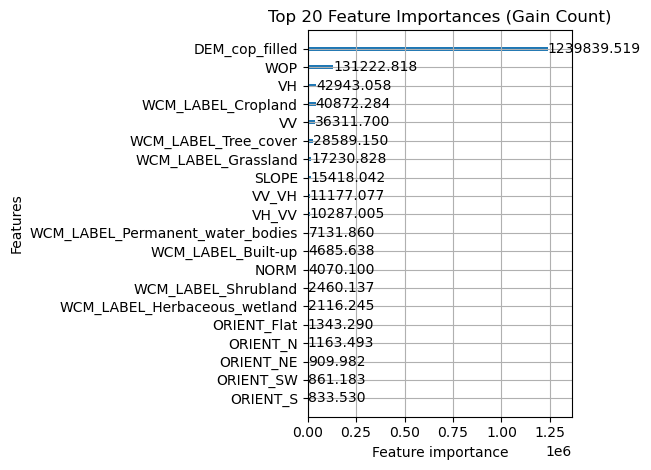

In [40]:
import lightgbm as lgb

# Feature importance plotting
lgb.plot_importance(lgb_best_model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Feature Importances (Gain Count)")
plt.tight_layout()
plt.show()

#### 6.2 XGB optimization

In [38]:
# Base XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Param distribution to search
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 12),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),  # minimum loss reduction required for a split
    'min_child_weight': randint(1, 10)  # minimum sum of instance weight (hessian) in a child
}

# Randomized SearchCV
xgb_rs = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # can increase later
    scoring='balanced_accuracy',
    cv=3,
    verbose=2,
    # n_jobs=-1,
    random_state=42
)

# Fit on your 1% subsample
xgb_rs.fit(X_train_sub, y_train_sub.values.ravel())

# best model
xgb_best_model = xgb_rs.best_estimator_

# Print best results
print("Best score:", xgb_rs.best_score_)
print("Best params:", xgb_rs.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=221, subsample=0.662397808134481; total time=   1.9s
[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=221, subsample=0.662397808134481; total time=   1.8s
[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=221, subsample=0.662397808134481; total time=   1.8s
[CV] END colsample_bytree=0.6232334448672797, gamma=4.330880728874676, learning_rate=0.13022300234864176, max_depth=10, min_child_weight=3, n_estimators=249, subsample=0.6225646316108401; total time=   2.6s
[CV] END colsample_bytree=0.6232334448672797, gamma=4.330880728874676, learning_rate=0.13022300234864176, max_depth=10, min

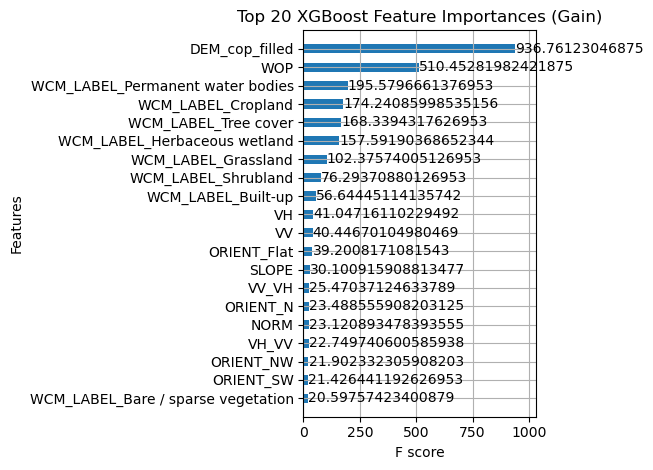

In [39]:
from xgboost import plot_importance

# Extract the trained Booster from the XGBClassifier
booster = xgb_best_model.get_booster()

# Plot top 20 features by gain
plot_importance(booster, 
                importance_type='gain', 
                max_num_features=20,
                title='Top 20 XGBoost Feature Importances (Gain)',
                height=0.5)
plt.tight_layout()
plt.show()

#### 6.3 Best Model

In [ ]:
best_model = LGBMClassifier(
    scale_pos_weight=scale_pos_weight,
    colsample_bytree=0.776,
    learning_rate=0.0503,
    max_depth=9,
    min_child_samples=61,
    n_estimators=195,
    num_leaves=48,
    subsample=0.692,
    random_state=42
)

best_model.fit(X_train_preproc_df, y_train.values.ravel())

# Predict on holdout set
y_pred = best_model.predict(X_train_preproc_df)

# Calculate Balanced Accuracy
bal_acc = classification_report(y_test, y_pred)
print(f"Balanced Accuracy on holdout set: {bal_acc:.4f}")

Scatterplot hiperparámetros

In [ ]:
# # Creamos un scatterplot  para los hiperparametros
# fig = px.scatter(
#     results,
#     x='param_n_estimators',
#     y= 'param_max_depth',
#     size='mean_test_score',
#     color='mean_test_score',
#     labels={'param_n_estimators': 'Number of Estimators', 'param_max_depth': 'Max Depth'},
#     title='Hyperparameter Tuning Results'
# )

# # Customize the plot layout
# fig.update_layout(
#     coloraxis_colorbar=dict(title='Mean Test Score'),
#     height=600,
#     width=800,
#     showlegend=False
# )

# # Show the plot
# fig.show()

### 7. Model Evaluation

Evaluación de importancia de bandas y funcionamiento del modelo

Index(['VV', 'VH', 'Norm', 'VH_VV', 'DEM', 'SLOPE', 'WCM', 'WOP'], dtype='object')
[3 2 5 0 1 4 6 7]


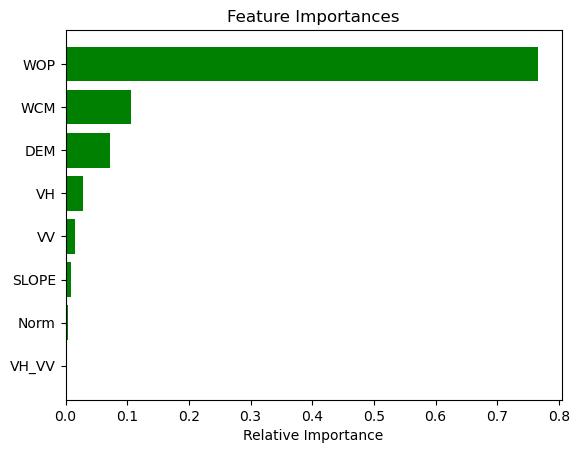


Classification Report :
              precision    recall  f1-score   support

     no_agua       0.94      0.93      0.93     69306
        agua       0.93      0.94      0.93     69070

    accuracy                           0.93    138376
   macro avg       0.93      0.93      0.93    138376
weighted avg       0.93      0.93      0.93    138376

Test Accuracy: 0.931657223796034
Test Kappa: 0.863315913233273

Classification Report :
              precision    recall  f1-score   support

     no_agua       0.94      0.93      0.93     69306
        agua       0.93      0.94      0.93     69070

    accuracy                           0.93    138376
   macro avg       0.93      0.93      0.93    138376
weighted avg       0.93      0.93      0.93    138376



<Figure size 640x480 with 0 Axes>

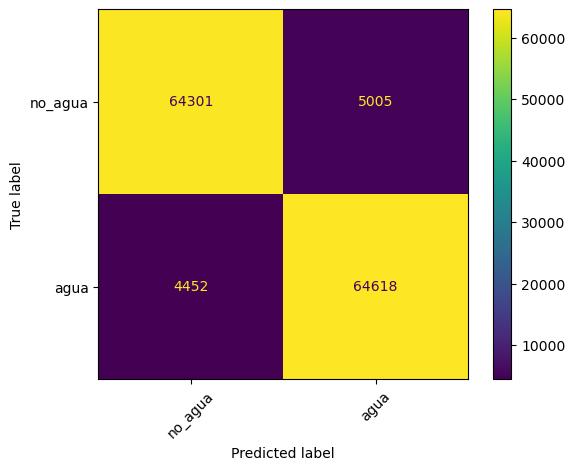

In [ ]:
# #calculamos la prediccion
# # Feature importance from the XGBoost model
# importances = model.feature_importances_

# features_sel= X.columns
# print(features_sel)
# indices = np.argsort(importances)
# print(indices)
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='g', align='center')
# plt.yticks(range(len(indices)), [features_sel[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()
# plt.savefig('Feature_importance.pdf')
# plt.savefig('Feature_importance.png')
# prediccion = model.predict(Xtest)
# prediccion = [1 if i > .5 else 0 for i in prediccion]

# #Classification report
# classes = ['no_agua','agua']
# print("\nClassification Report :")
# print(classification_report(ytest, prediccion, target_names=classes))

# Kappa=cohen_kappa_score(ytest, prediccion)
# accuracy = accuracy_score(ytest, prediccion)

# print(f"Test Accuracy: {accuracy}")
# print(f"Test Kappa: {Kappa}")
# print("\nClassification Report :")
# print(classification_report(ytest, prediccion, target_names=classes))

# # Confusion matrix
# cm = confusion_matrix(ytest, prediccion)
# classes = ['no_agua','agua']

# ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot();
# plt.xticks(rotation=45)
# plt.show()

#### 7.2 Model evaluation in a image

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)

Classification Report :
              precision    recall  f1-score   support

     no_agua       0.98      0.98      0.98    243151
        agua       0.79      0.73      0.76     18993

    accuracy                           0.97    262144
   macro avg       0.88      0.86      0.87    262144
weighted avg       0.97      0.97      0.97    262144

Test Accuracy: 0.9662055969238281
Test Kappa: 0.7405627997096027

Classification Report :
              precision    recall  f1-score   support

     no_agua       0.98      0.98      0.98    243151
        agua       0.79      0.73      0.76     18993

    accuracy                           0.97    262144
   macro avg       0.88      0.86      0.87    262144
weighted avg       0.97      0.97      0.97    26214

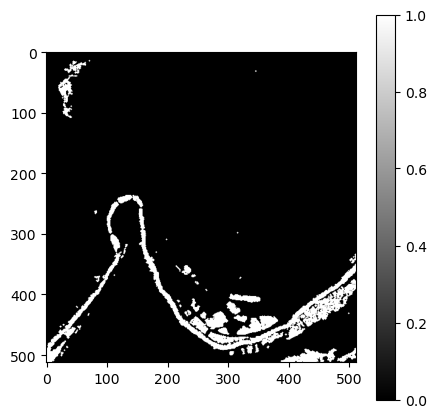

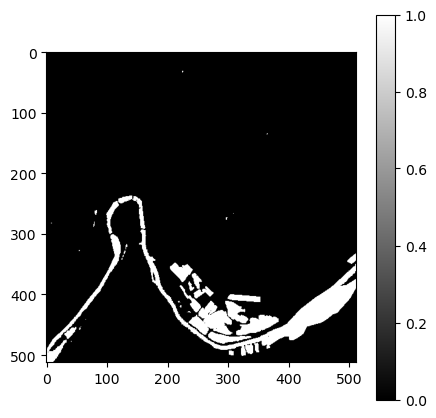

In [ ]:
# ##Repetimos para una imagen
# num_file = 90
# df, y_file, row, col = dA.archivo(num_file)

# predictions1 = model.predict(df)

# #Convertimos las probabilidades en 0 y 1
# ypred1 = [1 if i > .5 else 0 for i in predictions1]

# #Classification report
# ypred1 = np.reshape(ypred1,(row,col))
# ypred1 = binary_opening(ypred1)
# ypred1 = np.reshape(ypred1,(row*col))

# #Classification report

# print("\nClassification Report :")
# print(classification_report(y_file, ypred1, target_names=classes))

# Kappa=cohen_kappa_score(y_file, ypred1)
# accuracy = accuracy_score(y_file, ypred1)

# print(f"Test Accuracy: {accuracy}")
# print(f"Test Kappa: {Kappa}")
# print("\nClassification Report :")
# print(classification_report(y_file, ypred1, target_names=classes))

# ypred1 = np.reshape(ypred1,(row,col))
# y_file = np.reshape(y_file,(row,col))

# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(ypred1, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.show() #muestra el grafico

# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(y_file, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.show() #muestra el grafico

Abrir bandas

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


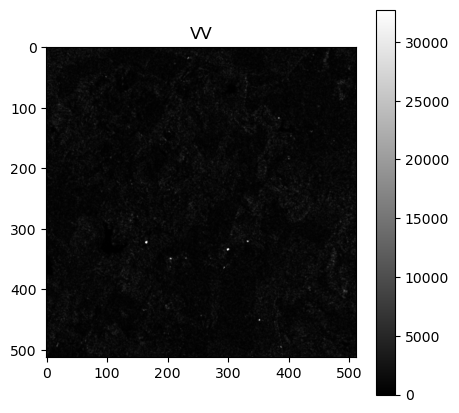

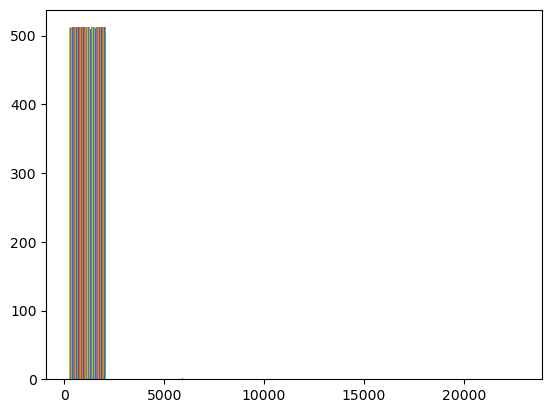

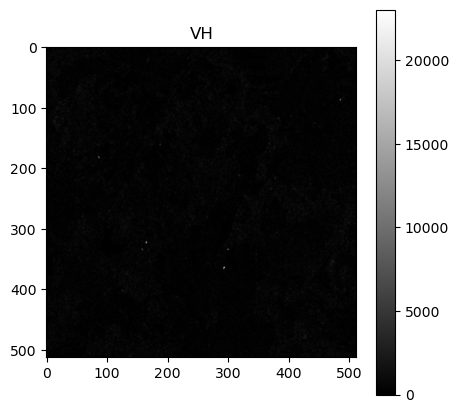

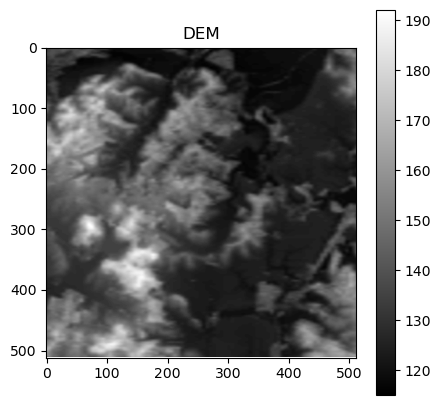

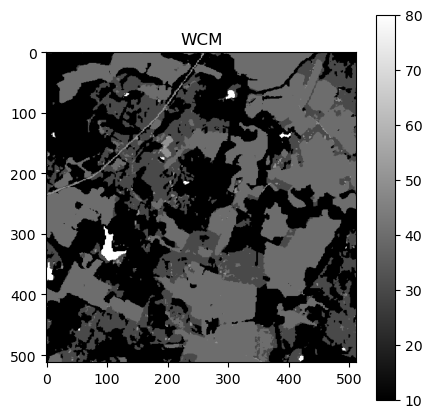

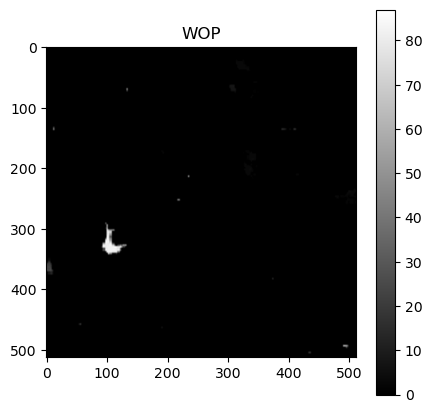

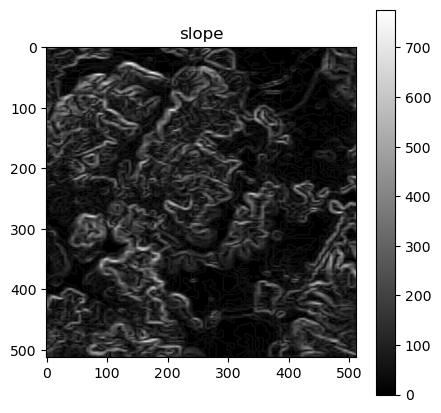

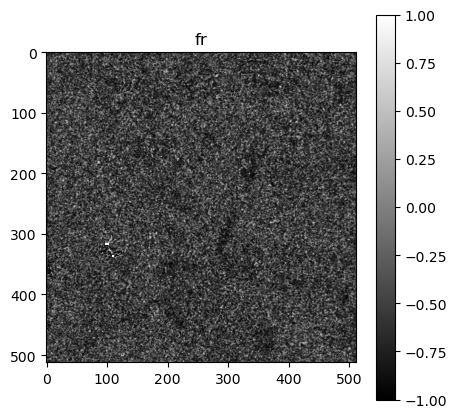

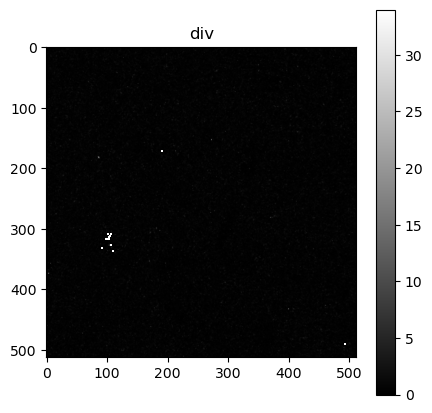

In [ ]:
# #Obtencion de los path iterativamente
# path_images = 'C:/Users/tromp/Desktop/Trabajo_AEI/Track1/train/images/%d.tif' %num_file
# path_labels = 'C:/Users/tromp/Desktop/Trabajo_AEI/Track1/train/labels/%d.png' %num_file

# #Apertura de los datos y los labels
# data = rio.open(path_images) 
# labels = rio.open(path_labels) 

# #Bandas dataset
# b1 = data.read(1).astype('float64')
# b2 = data.read(2).astype('float64')
# b4 = data.read(4).astype('float64')
# b5 = data.read(5).astype('float64')
# b6 = data.read(6).astype('float64')

# slp = dA.dem_sl(num_file)
# fr = (b2-b1)/(b2+b1)
# div = b2/b1


# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(b1, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.title('VV')
# plt.show() #muestra el grafico

# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(b2, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.title('VH')
# plt.show() #muestra el grafico

# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(b4, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.title('DEM')
# plt.show() #muestra el grafico

# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(b5, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.title('WCM')
# plt.show() #muestra el grafico

# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(b6, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.title('WOP')
# plt.show() #muestra el grafico

# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(slp, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.title('slope')
# plt.show() #muestra el grafico

# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(fr, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.title('fr')
# plt.show() #muestra el grafico

# fig, ax = plt.subplots(figsize=(5, 5)) #creacion de la figura en matplotlib
# img_plot = ax.imshow(div, cmap='gray') #grafico de matriz con imshow
# fig.colorbar(img_plot, ax=ax) #añadir barra de colores
# plt.title('div')
# plt.show() #muestra el grafico

Seleccion de casos